---  
## Probability & Statistics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement
from itertools import product

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('./datasets/house_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# tabela de frequência -----------------------------------------------------------------------
# (para variáveis categóricas)

col = 'LotConfig'
freq = pd.concat( [ df[col].value_counts(),
                    round(df[col].value_counts(normalize=True)*100, 2),
                    df[col].value_counts().cumsum(),
                    round(df[col].value_counts(normalize=True).cumsum()*100, 2)],
                    axis=1,
                    keys = ("freq_abs", 'freq_rel_%', "freq_abs_acum", 'freq_rel_acum_%'))

freq

,freq,freq_acum,freq_rel_%,freq_rel_acum_%
Inside,1052,1052,72.05,72.05
Corner,263,1315,18.01,90.07
CulDSac,94,1409,6.44,96.51
FR2,47,1456,3.22,99.73
FR3,4,1460,0.27,100.00


<AxesSubplot: >

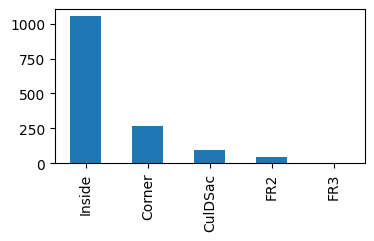

In [4]:
df[col].value_counts().plot(kind='bar', figsize=(4,2))

In [5]:
# pivot table --------------------------------------------------------------------------------
pivot = df.pivot_table(index='LandSlope', columns='LotShape', values='Id', 
                       aggfunc='count',
                       fill_value=0,
                       margins=True, margins_name='Total')
pivot

LotShape,IR1,IR2,IR3,Reg,Total
LandSlope,,,,,
Gtl,448,33,9,892,1382
Mod,29,5,0,31,65
Sev,7,3,1,2,13
Total,484,41,10,925,1460


In [20]:
# pivot table freq --------------------------------------------------------------------------------
func = lambda x: round(x.count()/df.shape[0] * 100, 2)

pivot = df.pivot_table(index='LandSlope', columns='LotShape', values='Id',
                       aggfunc=func,
                       fill_value=0,
                       margins=True, margins_name='Total%')
pivot.style.format('{0:,.2f}%')

LotShape,IR1,IR2,IR3,Reg,Total%
LandSlope,,,,,
Gtl,24.81%,1.83%,0.50%,68.44%,95.59%
Mod,1.33%,0.33%,0.00%,2.33%,4.00%
Sev,0.25%,0.00%,0.08%,0.08%,0.42%
Total%,26.39%,2.16%,0.58%,70.86%,100.00%


In [7]:
# joint distributions --------------------------------------------------------------------------------
df = df[df['LotFrontage'].isna()==False]
df[['LotFrontage', 'LotArea']].isna().sum()

LotFrontage    0
LotArea        0
dtype: int64

In [8]:
df['LotFrontage_bins'] = pd.cut( df['LotFrontage'], bins= [0,20,60,80,float("Inf")], labels=['0_20','20_60','60_80', '80+'])
df['LotArea_bins'] = pd.cut( df['LotArea'], bins= [0,2000,8000,12000,float("Inf")], labels=['0_2k','2k_8k','8k_12k','12k+'])

In [21]:
func = lambda x: x.count()/df.shape[0]

pivot = df.pivot_table(index='LotFrontage_bins', columns='LotArea_bins', values='Id',
                       aggfunc=func,
                       fill_value=0,
                       margins=True, margins_name='Total%')

pivot.style.format('{0:,.2%}')

LotArea_bins,0_2k,2k_8k,8k_12k,12k+,Total%
LotFrontage_bins,,,,,
20_60,2.00%,20.65%,11.57%,3.00%,37.22%
60_80,0.00%,6.83%,27.64%,4.66%,39.13%
80+,0.00%,1.08%,11.41%,11.16%,23.65%
Total%,2.00%,28.56%,50.62%,18.82%,100.00%


In [16]:
pivot.style.background_gradient(subset=pd.IndexSlice[pivot.index!='Total%', pivot.columns!='Total%'], 
                                #vmin=0, vmax=50,
                                cmap='Blues').format('{0:,.2f}%')

LotArea_bins,0_2k,2k_8k,8k_12k,12k+,Total%
LotFrontage_bins,,,,,
20_60,2.00%,20.65%,11.57%,3.00%,37.22%
60_80,0.00%,6.83%,27.64%,4.66%,39.13%
80+,0.00%,1.08%,11.41%,11.16%,23.65%
Total%,2.00%,28.56%,50.62%,18.82%,100.00%


In [36]:
pivot.style.background_gradient(subset=pd.IndexSlice[pivot.index!='Total%', pivot.columns!='Total%'], 
                                cmap='Blues',
                                vmin=pivot.iloc[:3,:4].min().min(), vmax=pivot.iloc[:3,:4].max().max()).\
                                background_gradient(subset=pd.IndexSlice[pivot.index!='Total%', pivot.columns=='Total%'], 
                                cmap='Blues',
                                vmin=pivot.iloc[:-1,-1].min().min(), vmax=pivot.iloc[:-1,-1].max().max()).\
                                format('{0:,.2%}')

LotArea_bins,0_2k,2k_8k,8k_12k,12k+,Total%
LotFrontage_bins,,,,,
20_60,2.00%,20.65%,11.57%,3.00%,37.22%
60_80,0.00%,6.83%,27.64%,4.66%,39.13%
80+,0.00%,1.08%,11.41%,11.16%,23.65%
Total%,2.00%,28.56%,50.62%,18.82%,100.00%


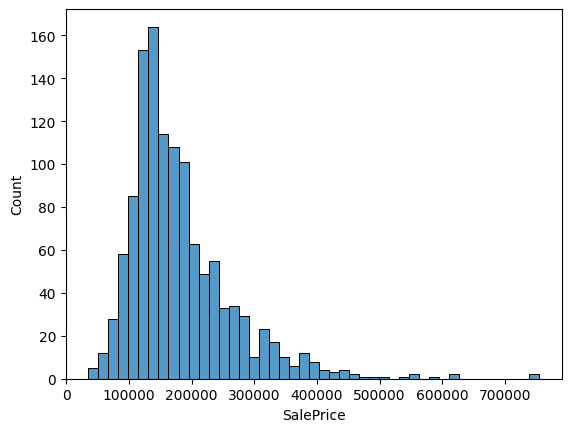

In [42]:
# histograma ----------------------------------------------------------------------------------
sns.histplot(data=df, x='SalePrice');

In [81]:
# medidas de tendência central ---------------------------------------------------------------
print(f"média: {df['SalePrice'].mean():,.2f}")
print(f"mediana: {df['SalePrice'].median():,.2f}")
print(f"moda: {df['SalePrice'].mode().to_list()}")

média: 180,770.48
mediana: 159,500.00
moda: [140000]


In [97]:
# medidas de dispersão -----------------------------------------------------------------------
print(f"amplitude: {df['SalePrice'].max()-df['SalePrice'].min():,.2f}")
print(f"interquartil: {df['SalePrice'].quantile(.75) - df['SalePrice'].quantile(.25):,.2f}")
print(f"desvio padrão: {df['SalePrice'].std():,.2f}")
print(f"variância: {df['SalePrice'].var():,.2f}")

print(f"Coeficiente de variação: {df['SalePrice'].std()/df['SalePrice'].mean():,.2%}")
# analisa a dispersão em termos relativos, ele será dado em %.
# Quanto menor for o valor do coeficiente de variação, mais homogêneos serão os dados,
# ou seja, menor será a dispersão em torno da média.
#    menor ou igual a 15% → baixa dispersão: dados homogêneos
#    entre 15 e 30% → média dispersão
#    maior que 30% → alta dispersão: dados heterogêneos

amplitude: 720,100.00
interquartil: 86,000.00
desvio padrão: 83,389.52
variância: 6,953,812,023.40
Coeficiente de variação: 46.13%


In [95]:
# medidas de assimatria de uma distribuição -------------------------------------------------
# Skewness mede essencialmente a simetria da distribuição, 
# enquanto a Kurtosis determina o peso das caudas da distribuição.

print(f"Kurtosis: {df['SalePrice'].kurtosis():,.2f}")
# · Se a distribuição for alta e fina, é chamada de distribuição leptocúrtica (Curtose > 3).
#   Os valores em uma distribuição leptocúrtica estão próximos da média ou nos extremos.
# · Uma distribuição plana onde os valores são moderadamente espalhados (ou seja, ao contrário da 
#   leptocúrtica) é chamada de distribuição platicúrtica (curtose <3).
# · Alta curtose em um conjunto de dados é um indicador de que os dados têm grandes outliers.
# · A baixa curtose em um conjunto de dados é um indicador de que os dados não apresentam outliers.

print(f"Skewness: {df['SalePrice'].skew():,.2f}")
# · Se a assimetria estiver entre -0,5 e 0,5, os dados são bastante simétricos
# · Se a assimetria estiver entre -1 e — 0,5 ou entre 0,5 e 1, os dados estão moderadamente distorcidos
# · Se a assimetria for menor que -1 ou maior que 1, os dados estão altamente distorcidos

kurtosis: 6.27
skewness: 1.90


In [115]:
# outliers -------------------------------------------------------------------------------------
# método interquartil (tukey)
q1 = df['SalePrice'].quantile(.25)
q3 = df['SalePrice'].quantile(.75)
lower, upper = q1 - ((q3-q1)*1.5),  q3 + ((q3-q1)*1.5)
idx=np.where((df['SalePrice'] < lower) | (df['SalePrice'] > upper))

print(f'quantidade de outliers: {len(idx[0])}')
print('Outliers:')
df[df.index.isin(idx[0])].head()

quantidade de outliers: 57
Outliers:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_bins,LotArea_bins
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500,60_80,8k_12k
44,45,20,RL,70.0,7945,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1959,1959,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,179,BLQ,506,465,1150,GasA,Ex,Y,FuseA,1150,0,0,1150,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,1,300,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,141000,60_80,2k_8k
49,50,20,RL,66.0,7742,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,7,1966,1966,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,763,Unf,0,192,955,GasA,Ex,Y,SBrkr,955,0,0,955,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1966.0,Unf,1,386,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,127000,60_80,2k_8k
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500,20_60,2k_8k
132,133,20,RL,75.0,7388,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1959,2002,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,405,Unf,0,658,1063,GasA,Gd,Y,SBrkr,1327,0,0,1327,1,0,1,0,3,1,Gd,7,Typ,0,NaN,Detchd,1974.0,Unf,2,624,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,150750,60_80,2k_8k


In [245]:
# outliers -------------------------------------------------------------------------------------
# método desvio padrão
cutoff = 2 * df['SalePrice'].std()
lower, upper = df['SalePrice'].mean() - cutoff, df['SalePrice'].mean() + cutoff
idx=np.where((df['SalePrice'] < lower) | (df['SalePrice'] > upper))

print(f'quantidade de outliers: {len(idx[0])}')
print('Outliers:')
df[df.index.isin(idx[0])].head()

quantidade de outliers: 54
Outliers:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_bins,LotArea_bins
44,45,20,RL,70.0,7945,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1959,1959,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,179,BLQ,506,465,1150,GasA,Ex,Y,FuseA,1150,0,0,1150,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,1,300,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,141000,60_80,2k_8k
49,50,20,RL,66.0,7742,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,7,1966,1966,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,763,Unf,0,192,955,GasA,Ex,Y,SBrkr,955,0,0,955,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1966.0,Unf,1,386,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,127000,60_80,2k_8k
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500,20_60,2k_8k
132,133,20,RL,75.0,7388,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1959,2002,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,405,Unf,0,658,1063,GasA,Gd,Y,SBrkr,1327,0,0,1327,1,0,1,0,3,1,Gd,7,Typ,0,NaN,Detchd,1974.0,Unf,2,624,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,150750,60_80,2k_8k
145,146,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,6,5,2004,2006,Gable,CompShg,VinylSd,VinylSd,Stone,50.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,970,970,GasA,Ex,Y,SBrkr,970,739,0,1709,0,0,2,0,3,1,Gd,7,Maj1,0,NaN,Detchd,2004.0,Unf,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,130000,20_60,2k_8k


In [122]:
# outliers -------------------------------------------------------------------------------------
# método isolation forest
from sklearn.ensemble import IsolationForest

ifr = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1), max_features=1.0)
data = df['SalePrice'].values.reshape(-1,1)
ifr.fit(data)
out = ifr.predict(data)

print(f'quantidade de outliers: {np.sum(out == -1)}')
print('Outliers:')
df[out == -1].head()

quantidade de outliers: 120
Outliers:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_bins,LotArea_bins
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000,80+,8k_12k
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,380.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1158,1158,GasA,Ex,Y,SBrkr,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,RFn,3,853,TA,TA,Y,240,154,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300,80+,12k+
27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,No,GLQ,1218,Unf,0,486,1704,GasA,Ex,Y,SBrkr,1704,0,0,1704,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2008.0,RFn,3,772,TA,TA,Y,0,50,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000,80+,8k_12k
29,30,30,RM,60.0,6324,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,520,520,GasA,Fa,N,SBrkr,520,0,0,520,0,0,1,0,1,1,Fa,4,Typ,0,NaN,Detchd,1920.0,Unf,1,240,Fa,TA,Y,49,0,87,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,68500,20_60,2k_8k
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000,20_60,8k_12k


<AxesSubplot: xlabel='LotShape', ylabel='SalePrice'>

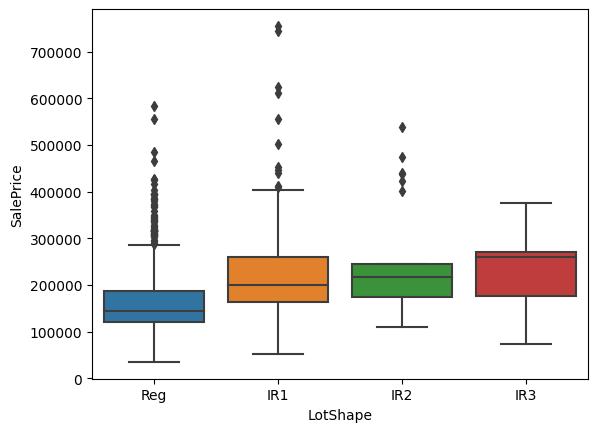

In [123]:
# boxplot ---------------------------------------------------------------------------------------
sns.boxplot(data=df, x='LotShape', y='SalePrice')

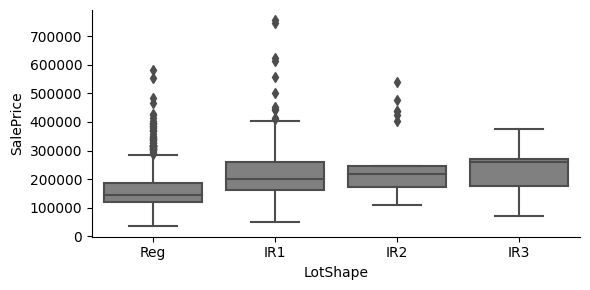

In [128]:
sns.catplot(data=df, x='LotShape', y='SalePrice', kind='box', height=3, aspect=2, color='gray')

---  
## Probabilidade

In [ ]:
# https://www.datacamp.com/tutorial/statistics-python-tutorial-probability-1
# https://www.dataquest.io/blog/basic-statistics-in-python-probability/
# https://livebook.manning.com/book/data-science-bookcamp/chapter-1/v-1/18

In [ ]:
# addition rule ----------------------------------------------------------------------------
# P(A or B) = P(A) + P(B) − P(A and B)

# mutually exclusive -----------------------------------------------------------------------
# são ditos eventos mutuamente exclusivos se eles não podem ocorrer ao mesmo tempo.
# P(A or B) = P(A) + P(B)

# Quando você joga uma moeda, você só pode obter cara ou coroa. 
# Você não pode ter os dois simultaneamente. Em um dado, o número rolado só pode ser par ou ímpar.
# Nenhum número nos dados atende a ambas as condições ao mesmo tempo.

# independent events -----------------------------------------------------------------------
# aqueles eventos cuja ocorrência não depende de nenhum outro evento.
# P(A and B) = P(A) ⋅ P(B)

# jogar dados 2 vezes
# jogar moeda 3 vezes    P = (1/2) * (1/2) * (1/2)
# jogar uma moeda e um dados

# dependent events -----------------------------------------------------------------------
# aqueles eventos que são afetados pelos resultados de eventos que já ocorreram anteriormente
# P(A and B) = P(A) ⋅ P(B|A)

# Uma carta é escolhida aleatoriamente de um baralho padrão de 52 cartas de baralho. 
# Sem reposição, uma segunda carta é escolhida. 
# Qual é a probabilidade de que a primeira carta escolhida seja um rei e 
# a segunda carta escolhida seja uma rainha?

# P (rei na 1a vez) = 4 /52
# P (rainha na 2a vez dado que rei foi na 1a) = 4 /51
# P (rei e rainha) = (4/52 × 4/51) = 16/2652 = 4 /663

In [ ]:
# conditional probability -----------------------------------------------------------------------
# ocorrer evento A, dado que o evento B ocorreu
# P(A|B) =   P(A∩B) / P(B)   =   ( P(A) ⋅ P(B|A) ) / P(B)
# P(A∩B) = a probabilidade de que o evento A e o evento B ocorram
# P(B) = a probabilidade de que o evento B ocorra

In [14]:
# Suponha que enviemos uma pesquisa para 300 indivíduos perguntando qual esporte 
# eles mais gostam: beisebol, basquete, futebol americano ou futebol.

df = pd.DataFrame({'gender': np.repeat(np.array(['Male', 'Female']), 150),
                   'count': np.repeat(1, 300),
                   'sport': np.repeat(np.array(['Baseball', 'Basketball', 'Football',
                                                'Soccer', 'Baseball', 'Basketball',
                                                'Football', 'Soccer']), 
                                    (34, 40, 58, 18, 34, 52, 20, 44))})

survey_data = df.pivot_table(index='gender', columns='sport', values='count', aggfunc='sum', margins=True)
survey_data

sport,Baseball,Basketball,Football,Soccer,All
gender,,,,,
Female,34,52,20,44,150
Male,34,40,58,18,150
All,68,92,78,62,300


In [15]:
# calcular a probabilidade de ser do sexo masculino, dado que o indivíduo prefere o beisebol
print(f'{survey_data.iloc[1, 0] / survey_data.iloc[2, 0]:.2%}')

# calcular a probabilidade de preferir basquete, dado que o indivíduo é do sexo feminino
print(f'{survey_data.iloc[0, 1] / survey_data.iloc[0, 4]:.2%}')

50.00%
34.67%


---  
## operações com normais

In [19]:
media1, std1 = 3, 1
media2, std2 = 7, 2

# soma de normais --------------------------------------------------------------------------------
media_soma = media1 + media2
std_soma = (std1**2 + std2**2)**0.5
print(f'soma de normais: média={media_soma} | std={std_soma:.2f}')

# diferença de normais --------------------------------------------------------------------------------
media_dif = media1 - media2
std_dif = (std1**2 + std2**2)**0.5
print(f'diferença de normais: média={media_dif} | std={std_dif:.2f}')

soma de normais: média=10 | std=2.24
diferença de normais: média=-4 | std=2.24


---  
## Distribuições Contínuas de probabilidade

In [8]:
# https;//www.statology.org
# http://library.isr.ist.utl.pt/docs/scipy/stats.html
# https://numpy.org/doc/1.16/reference/routines.random.html

def print_cont_dist(dist, size, loc, a, b):
    media = loc
    x = np.linspace(media-2*media, media+2*media, num=size)
    nums = dist.rvs(size=size)

    fig, ax = plt.subplots(2,3, figsize=(11,5))
    ax[0,0].plot(nums)
    ax[0,0].set_title("lineplot")
    ax[0,0].axhline(y=np.mean(nums), c='k')

    ax[0,1].hist(nums)
    ax[0,1].set_title("histograma")
    ax[0,1].axvline(x=np.mean(nums), c='k')

    ax[0,2].plot(dist.ppf(x), x)
    ax[0,2].set_title("Percent point function (ppf)")

    ax[1,0].plot(x, dist.pdf(x))
    ax[1,0].set_title("Probability density function (pdf)")

    ax[1,1].plot(x, dist.cdf(x))
    ax[1,1].set_title("Cumulative distribution function (cdf)")
    ax[1,1].axvline(x=a, c='gray', linestyle='dotted')
    ax[1,1].axvline(x=b, c='gray', linestyle='dotted')
    ax[1,1].axhline(y=dist.cdf(a), c='gray', linestyle='dotted')
    ax[1,1].axhline(y=dist.cdf(b), c='gray', linestyle='dotted')

    ax[1,2].plot(x, dist.sf(x))
    ax[1,2].set_title("Survival function (sf)")

    plt.tight_layout()
    plt.plot()

    print(f"prob ser <{a}: ", dist.cdf(a))
    print(f"prob ser <{b}: ", dist.cdf(b))
    print(f"prob ser {a}<X<{b}: ", dist.cdf(b) - dist.cdf(a))

prob ser <13:  0.8413447460685429
prob ser <20:  0.9995709396668032
prob ser 13<X<20:  0.1582261935982603


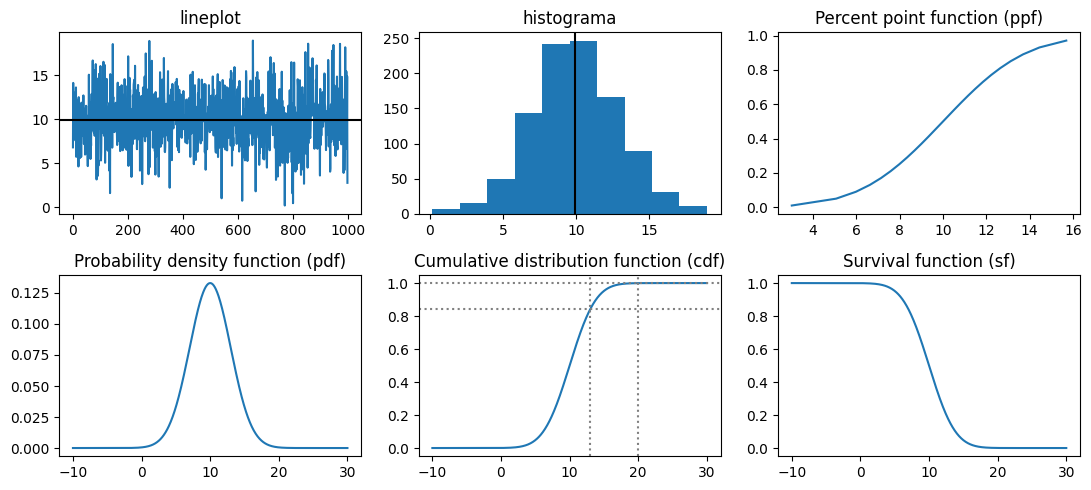

In [45]:
# ***************************************************************************************************
# normal --------------------------------------------------------------------------------------------
media = 10
desvpad = 3
size=1000
a, b = 13, 20
dist = stats.norm(loc=media, scale=desvpad)
print_cont_dist(dist=dist, size=size, loc=media, a=a, b=b)

In [6]:
# Uma companhia produz lâmpadas cuja vida segue uma distribuição normal com média 1.200 horas e desvio
# padrão de 250 horas. Escolhendo-se aleatoriamente uma lâmpada, qual é a probabilidade de sua durabilidade estar
# entre 900 e 1.300 horas?

media = 1200
desvpad = 250
a, b = 900, 1300
dist = stats.norm(loc=media, scale=desvpad)
print(f"{dist.cdf(b) - dist.cdf(a):2%}")

54.035207%


In [31]:
# Uma empresa de equipamentos esportivos produz aproximadamente 1.000.000 de bolas de futebol por ano,
# e a pressão nas bolas de futebol é normalmente distribuída com uma média de 8,7 PSI (libras por polegada quadrada)
# e um desvio padrão de 0,4 PSI. Eles selecionam aleatoriamente 25 bolas de futebol (sem reposição) para verificar 
# a pressão. Encontre a probabilidade de que a média da amostra ̄x esteja dentro de 0,2 PSI da média da população
media = 8.7
desvpad = 0.4
n = 25
a, b = (8.7-0.2), (8.7+0.2)

# 1) sampling distribution of the sample mean (SDSM) = distribuição amostral da média amostral
#    foi informado que o PSI na população de bolas de futebol é normalmente distribuído, então nosso SDSM também será normal,
#    mesmo que nosso tamanho de amostra seja menor que 30 e, portanto, atingimos a condição “normal”.
# 2) estamos amostrando sem reposição, o que significa que nossa amostra precisa ser no máximo 10% da população, mas 25 bolas
#    de futebol é uma amostra significativamente menor do que 10% da população, portanto, atendemos à condição "independente".
# 3) Para responder à questão da probabilidade, começaremos encontrando a média do SDSM. O Teorema do Limite Central nos diz 
#    que será igual à média da população, então μ ̄x = 8,7. O erro padrão será...
erropad = desvpad / (n**0.5)

dist = stats.norm(loc=media, scale=erropad)
print(f"{dist.cdf(b) - dist.cdf(a):2%}")

# Portanto, há uma chance de aproximadamente 98,75% de que a média ̄x da amostra de 25 bolas que a empresa coleta caia
# dentro de 0,2 PSI da média populacional de μ = 8,7 PSI.

98.758067%


prob ser <10:  0.5833333333333334
prob ser <13:  0.8333333333333334
prob ser 10<X<13:  0.25


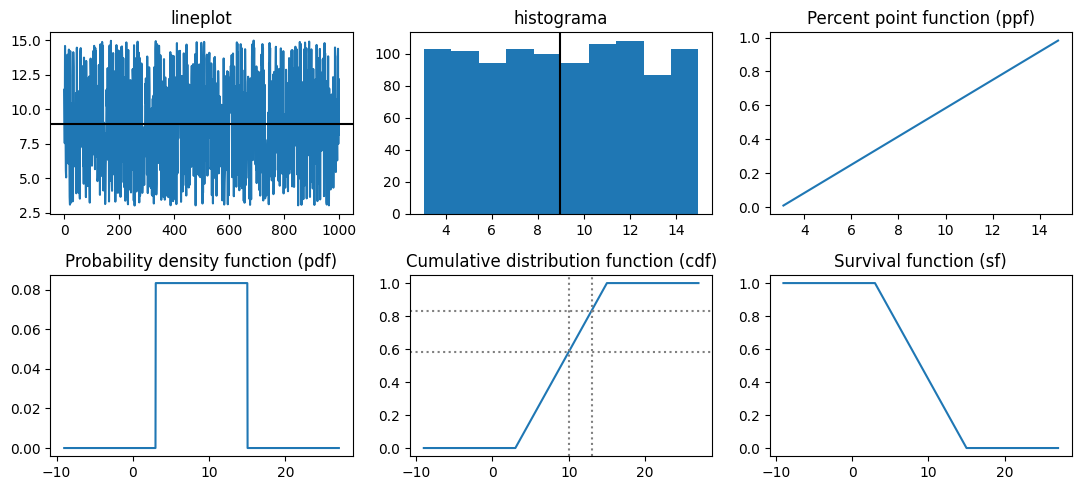

In [51]:
# ***************************************************************************************************
# uniforme ------------------------------------------------------------------------------------------
min = 3
max = 15
size=1000
a, b = 10, 13
dist = stats.uniform(loc=min, scale=(max-min))
print_cont_dist(dist=dist, size=size, loc=min+(max-min)/2, a=a, b=b)

In [52]:
# A dureza X de uma peça de aço pode ser pensada como uma variável aleatória uniforme 
# no intervalo (50,70) da escala Rockwel. 
# Qual é a probabilidade de que uma peça tenha dureza entre 55 e 60?

min = 50
max = 70
size=1000
a, b = 55, 60
dist = stats.uniform(loc=min, scale=(max-min))
print(f"{dist.cdf(b) - dist.cdf(a):2%}")

25.000000%


prob ser <13:  0.7274682069659875
prob ser <20:  0.8646647167633873
prob ser 13<X<20:  0.13719650979739983


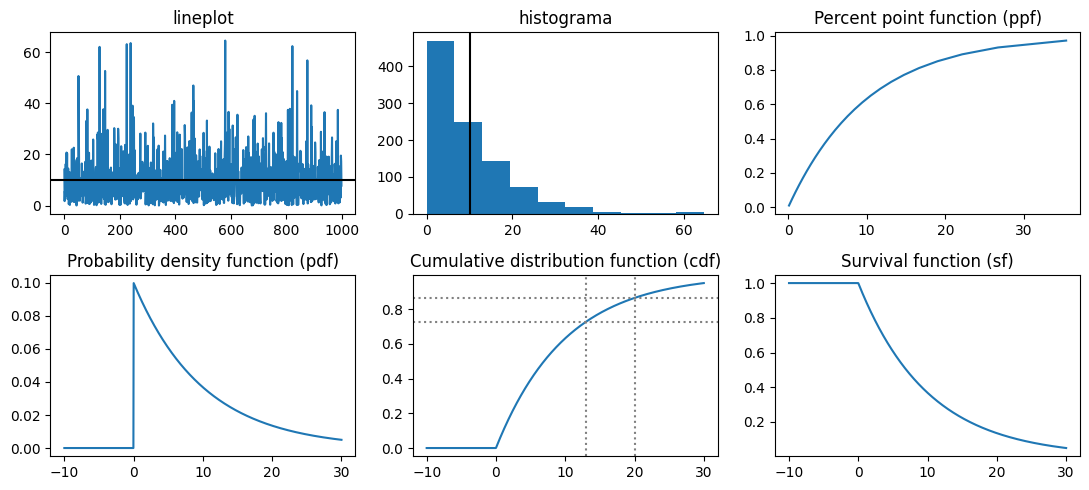

In [46]:
# ***************************************************************************************************
# exponencial ---------------------------------------------------------------------------------------
media = 10
size=1000
a, b = 13, 20
dist = stats.expon(scale=media)
print_cont_dist(dist=dist, size=size, loc=media, a=a, b=b)

In [55]:
# O tempo entre as chamadas telefônicas para uma loja de
# suprimentos é distribuído exponencialmente com um tempo médio
# de 15 minutos entre as chamadas. Determine:
media = 15
size=1000
dist = stats.expon(scale=media)
# a) A probabilidade de não haver chamadas por um período de 30 minutos.
print(f"a {1- dist.cdf(30):2%}")
# b) A probabilidade de que no mínimo uma chamada chegue dentro do intervalo de 10 minutos.
print(f"b {dist.cdf(10):2%}")
# c) A probabilidade de que a primeira chamada chegue entre 5 e 10 minutos.
print(f"c {dist.cdf(10) - dist.cdf(5):2%}")
# d) O intervalo de tempo, tal que exista uma probabilidade de 90% de haver no mínimo uma chamada no intervalo.
print(f"d {dist.ppf(0.9):2f}")

a 13.533528%
b 48.658288%
c 20.311419%
d 34.538776


---  
## Distribuições Discretas de probabilidade

In [170]:
def print_disc_dist(dist, size, loc, a=0, b=0):
    x = range(0,int(loc*2+loc))
    nums = dist.rvs(size=size)

    fig, ax = plt.subplots(2,3, figsize=(11,5))
    ax[0,0].plot(nums)
    ax[0,0].set_title("lineplot")
    ax[0,0].axhline(y=np.mean(nums), c='k')
    
    sns.histplot(nums, kde=False, ax=ax[0,1])
    ax[0,1].set_title("bar plot")

    ax[0,2].plot(dist.ppf(x), x)
    ax[0,2].set_title("Percent point function (ppf)")

    ax[1,0].bar(x, dist.pmf(x))
    ax[1,0].set_title("Probability mass function (pmf)")

    ax[1,1].bar(x, dist.cdf(x))
    ax[1,1].set_title("Cumulative distribution function (cdf)")
    ax[1,1].axvline(x=a, c='gray', linestyle='dotted')
    ax[1,1].axvline(x=b, c='gray', linestyle='dotted')
    ax[1,1].axhline(y=dist.cdf(a), c='gray', linestyle='dotted')
    ax[1,1].axhline(y=dist.cdf(b), c='gray', linestyle='dotted')

    ax[1,2].bar(x, dist.sf(x))
    ax[1,2].set_title("Survival function (sf)")

    plt.tight_layout()
    plt.plot()

    print(f"prob ser {a}: ", dist.pmf(a))
    print(f"prob ser {b}: ", dist.pmf(b))
    print(f"prob ser {a}<X<{b}: ", dist.cdf(b) - dist.cdf(a))

prob ser 3:  0.012457082879999982
prob ser 5:  0.10090237132800023
prob ser 3<X<5:  0.1429450260480001


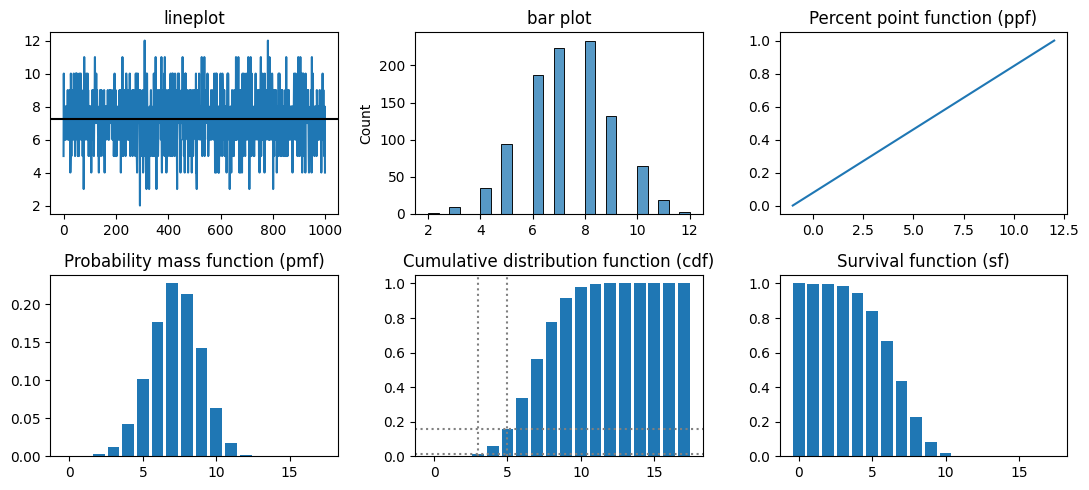

In [36]:
# https://towardsdatascience.com/binomial-distribution-ec76d74952c4

# ***************************************************************************************************
# binomial ------------------------------------------------------------------------------------------

# • cada ensaio deve ser independente (o resultado da tentativa anterior não pode afetar as posteriores), 
# • cada tentativa pode ser chamada de "sucesso" ou "fracasso",
# • há um número fixo de ensaios, e
# • a probabilidade de sucesso em cada tentativa é constante

trials = 12
prob_sucesso = 0.6
a, b = 3, 5 
size=1000
dist = stats.binom(n=trials, p=prob_sucesso)
print_disc_dist(dist=dist, size=size, loc=trials/2, a=a, b=b)

In [4]:
# Suponha que uma válvula eletrônica, instalada em determinado circuito, 
# tenha probabilidade 0.2 de funcionar durante o tempo de garantia. São ensaiadas 20 válvulas.
trials = 20
prob_sucesso = 0.2
dist = stats.binom(n=trials, p=prob_sucesso)
# Qual a probabilidade de que delas, exatamente k, funcionem durante o tempo de garantia
# (k = 0, 1, 2, ... 20)?
probs = {x:round(dist.pmf(k=x),4) for x in range(0,21)}
print(f"a {probs}")
# Qual a probabilidade de que 4 funcionem durante o tempo de garantia?
print(f"b {dist.pmf(k=4):2%}")
# Qual o número médio e o desvio padrão de válvulas que irão funcionar durante o tempo de garantia?
# média para dist binomial = trials * prob_sucesso
# desv pad para dist binomial = trials * prob_sucesso * prob_falha
print(f"c média: {trials*prob_sucesso}")
print(f"c desv pad: {(trials*prob_sucesso*(1-prob_sucesso))**0.5:2f}")

a {0: 0.0115, 1: 0.0576, 2: 0.1369, 3: 0.2054, 4: 0.2182, 5: 0.1746, 6: 0.1091, 7: 0.0545, 8: 0.0222, 9: 0.0074, 10: 0.002, 11: 0.0005, 12: 0.0001, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0}
b 21.819940%
c média: 4.0
c desv pad: 1.788854


In [162]:
# Encontre a probabilidade de obtermos pelo menos 1 cara em 5 lançamentos de moedas
trials = 5
prob_sucesso = 1/2
dist = stats.binom(n=trials, p=prob_sucesso)
print(f"a {1-dist.cdf(0):2%}")

# qual o número médio de caras que conseguiremos em 5 lançamentos?
print(f"b média: {trials*prob_sucesso}")
print(f"b desv pad: {(trials*prob_sucesso*(1-prob_sucesso))**0.5:2f}")

a 96.875000%
b média: 2.5
b desv pad: 1.118034


In [151]:
# há três bolinhas de gude em um saco: 2 são verdes e 1 é vermelha. 
# Vamos fazer 5 tentativas em que puxamos uma bolinha, anotamos a cor e depois recolocamos a bolinha.
# Qual é a probabilidade de obtermos a bolinha vermelha exatamente 3 vezes?
trials = 5
prob_sucesso = 1/3
dist = stats.binom(n=trials, p=prob_sucesso)
print(f"a {dist.pmf(k=3):2%}")

a 16.460905%


prob ser 20:  0.04181030500106466
prob ser 0:  3.059023205018258e-07
prob ser 20<X<0:  -0.9170287840662192


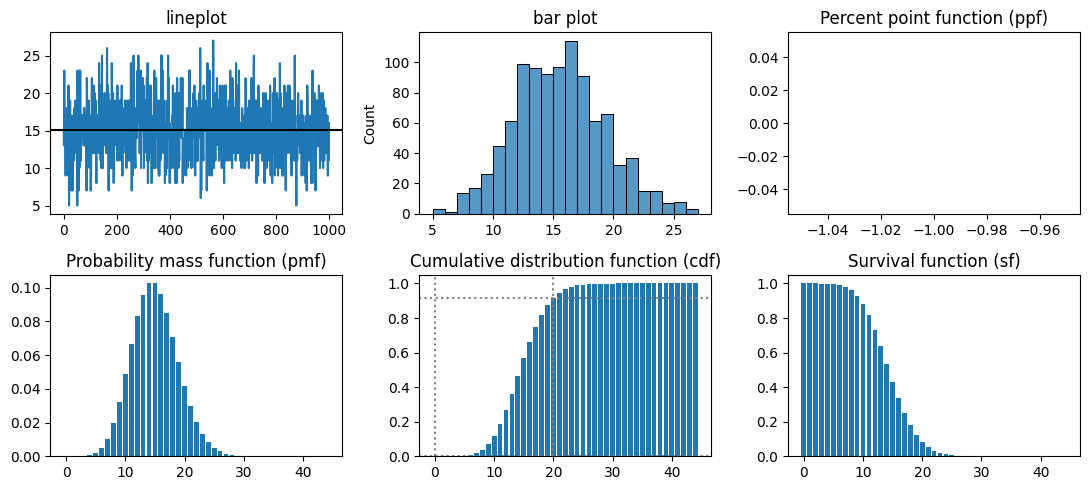

In [47]:
# ***************************************************************************************************
# poisson -------------------------------------------------------------------------------------------
# descreve a probabilidade de obter k sucessos durante um determinado intervalo.

# O experimento conta o número de ocorrências de um evento sobre alguma outra medida,
# A média é a mesma para cada intervalo,
# A contagem de eventos em cada intervalo é independente dos outros intervalos, e
# Os intervalos não se sobrepõem.
# A probabilidade do evento ocorrer é proporcional ao período de tempo

taxa_intervalo = 15
qtd_sucesso = 20
size=1000

dist = stats.poisson(taxa_intervalo)
print_disc_dist(dist=dist, size=size, loc=taxa_intervalo, a=qtd_sucesso)

In [50]:
# Uma certa loja vende em média sete bolas de futebol por dia. 
# Qual é a probabilidade de que esta loja venda quatro ou menos bolas de futebol em um determinado dia
taxa_intervalo = 7
qtd_sucesso = [0, 1, 2, 3, 4]

dist = stats.poisson(taxa_intervalo)
print(f"{dist.pmf(k=qtd_sucesso).sum():2%}")
print(f"{dist.cdf(4):2%}")

17.299161%
17.299161%


In [53]:
# Suponha que quando temos dados sobre a observação de furacões durante um período de 20 anos,
# descobrimos que o número médio de furacões por ano é 7. Cada ano é independente dos anos anteriores,
# o que significa que se observamos 8 furacões este ano, não significa que observaremos 8 no próximo.
taxa_intervalo = 7
dist = stats.poisson(taxa_intervalo)

# qual é a probabilidade de observar exatamente 5 furacões este ano?
print(f"a {dist.pmf(5):.2%}")
# e se quiséssemos descobrir a probabilidade de ver até 5 furacões (matematicamente: k≤5)
print(f"b {dist.cdf(5):.2%}")
# e se estivermos interessados na probabilidade de observar mais de 5 furacões
print(f"c {1-dist.cdf(5):.2%}")

a 12.77%
b 30.07%
c 69.93%


In [54]:
# Em uma experiência de laboratório passam, em média, por um contador, quatro partículas radioativas por milissegundo.
# Qual a probabilidade de entrarem no contador seis partículas em determinado milissegundo?
taxa_intervalo = 4
dist = stats.poisson(taxa_intervalo)
print(f"a {dist.pmf(6):.2%}")

a 10.42%


In [55]:
# Chegam, em média, 10 navios-tanque por dia a um movimentado porto, que tem capacidade para 15
# desses navios. Qual a probabilidade de que, em determinado dia, um ou
# mais navios tanque tenham de ficar ao largo, aguardando vaga?
taxa_intervalo = 10
dist = stats.poisson(taxa_intervalo)
print(f"a {1- dist.cdf(15):.2%}")

a 4.87%


In [57]:
# Uma central telefônica recebe em média 300 chamadas por hora e pode processar no
# máximo 10 ligações por minuto. Estimar a probabilidade de a capacidade da mesa ser ultrapassada.
taxa_intervalo = 5   # convertido para chamadas/minuto .... 300/60
dist = stats.poisson(taxa_intervalo)
print(f"a {1- dist.cdf(10):.2%}")

a 1.37%


In [157]:
# se acreditarmos que o número médio de carros que passam pelo cruzamento em qualquer hora 
# específica é λ = 15, e se quisermos saber a probabilidade de que x = 13 carros passarão 
# por ele na próxima hora, essa probabilidade será
taxa_intervalo = 15
dist = stats.poisson(taxa_intervalo)
print(f"a {dist.pmf(13):.2%}")

# se quisermos saber a probabilidade de no máximo 7 carros passarem pelo cruzamento em uma hora,
print(f"a {dist.cdf(7):.2%}")

a 9.56%
a 1.80%


In [163]:
# Um carpinteiro é capaz de construir, em média, 3 cadeiras por dia. Encontre a probabilidade de 
# que ele possa construir 5 cadeiras amanhã
taxa_intervalo = 3
dist = stats.poisson(taxa_intervalo)
print(f"a {dist.pmf(5):.2%}")

a 10.08%


In [168]:
# Há 40 alunos em um curso universitário de matemática, e cada um deles tem 4,5% de chance de esquecer
# sua calculadora em qualquer dia. Qual é a probabilidade de que exatamente 5 deles esqueçam sua calculadora hoje?
taxa_intervalo = 40*0.045
dist = stats.poisson(taxa_intervalo)
print(f"a {dist.pmf(5):.2%}")

a 2.60%


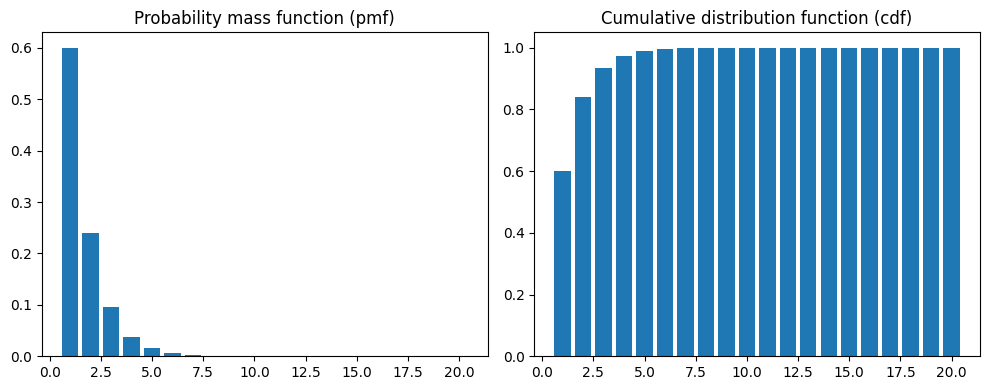

In [188]:
# ***************************************************************************************************
# geométrica ----------------------------------------------------------------------------------------
# quando realizamos uma sequência de tentativas independentes de Bernoulli até encontrarmos o primeiro sucesso

prob_sucesso = 0.6
dist = stats.geom(prob_sucesso)

# ---- plot --------------------------------------------------
x = range(1,21)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].bar(x, dist.pmf(x))
ax[0].set_title("Probability mass function (pmf)")
ax[1].bar(x, dist.cdf(x))
ax[1].set_title("Cumulative distribution function (cdf)")
plt.tight_layout()
plt.show()

In [203]:
# Estou jogando um jogo em que a probabilidade de ganhar um prêmio é de 0,7. Qual é a probabilidade de 
# eu não ganhar um prêmio até a 4ª vez que jogar o jogo, supondo que cada jogo seja independente?
prob_sucesso = 0.7
dist = stats.geom(prob_sucesso)
print(f"a) Há uma chance de aproximadamente {dist.pmf(4):.2%} de eu não ganhar um prêmio até o quarto jogo")

# a probabilidade de levarmos menos de 4 jogos para ganhar um prêmio
print(f"b) {dist.cdf(3):.2%}")

# a probabilidade de levarmos no máximo 4 jogos para ganhar um prêmio.
print(f"c) {dist.cdf(4):.2%}")

# a probabilidade de levar mais de 2 jogos para ganhar é
print(f"d) {1-dist.cdf(2):.2%}")

# em média, quantas vezes preciso jogar para ganhar o jogo?
print(f"d) média: {1/prob_sucesso:.2f}")
print(f"d) desvpad: {((1-prob_sucesso)/prob_sucesso**2)**0.5:.2f}")

a) Há uma chance de aproximadamente 1.89% de eu não ganhar um prêmio até o quarto jogo
b) 97.30%
c) 99.19%
d) 9.00%
d) média: 1.43
d) desvpad: 0.78


In [204]:
# Suponha que 35% dos alunos do ensino médio de nosso país farão pelo menos um exame de Enem este ano.
# Suponha que selecionamos alunos aleatoriamente e perguntamos se eles farão o exame. 
# Qual é a probabilidade de precisarmos perguntar para exatamente 3 pessoas para encontrar alguém que fará o exame?
prob_sucesso = 0.35
dist = stats.geom(prob_sucesso)
print(f"a) {dist.pmf(3):.2%}")

a) 14.79%


prob ser 3:  0.08154261704681873
prob ser 0:  0.22153361344537817
prob ser 3<X<0:  -0.7672418967587035


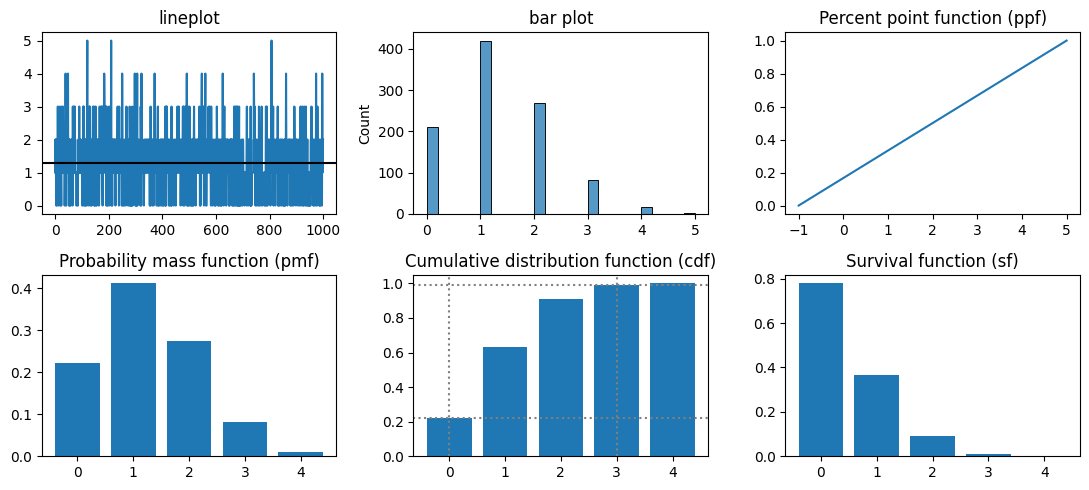

In [38]:
# https://towardsdatascience.com/hypergeometric-distribution-explained-with-python-2c80bc613bf4

# ***************************************************************************************************
# hipergeométrica -----------------------------------------------------------------------------------
# É usado quando você deseja determinar a probabilidade de obter um certo número de sucessos 
# sem reposição de um tamanho de amostra específico. Isso é semelhante à distribuição binomial, 
# mas você não recebe a probabilidade de sucesso.

population_size = 52             # deck de cartas
qty_in_pop_with_feature = 13     # espadas
sample_size= 5                   # se retirarmos 5 cartas ...
qty_in_sample_we_desire = 3      # ...qual probabilidade de 3 serem de espada?
size=1000

dist = stats.hypergeom(population_size, qty_in_pop_with_feature, sample_size)
print_disc_dist(dist=dist, size=size, loc=sample_size/3, a=qty_in_sample_we_desire)

In [40]:
# Uma urna contém 3 bolas vermelhas e 5 bolas verdes. Você escolhe aleatoriamente 4 bolas. 
# Qual é a probabilidade de você escolher exatamente 2 bolas vermelhas?
population_size = 8
qty_in_pop_with_feature = 3
sample_size= 4
qty_in_sample_we_desire = 2

dist = stats.hypergeom(population_size, qty_in_pop_with_feature, sample_size)
print(f"{dist.pmf(k=qty_in_sample_we_desire):2%}")

42.857143%


In [41]:
# Uma cesta contém 7 bolinhas roxas e 3 bolinhas rosa. Você escolhe aleatoriamente 6 bolinhas. 
# Qual é a probabilidade de você escolher exatamente 3 bolinhas rosa?
population_size = 10
qty_in_pop_with_feature = 3
sample_size= 6
qty_in_sample_we_desire = 3

dist = stats.hypergeom(population_size, qty_in_pop_with_feature, sample_size)
print(f"{dist.pmf(k=qty_in_sample_we_desire):2%}")

16.666667%


In [45]:
# Pequenos motores elétricos são expedidos em lotes de 50 unidades. Antes que uma remessa seja aprovada, um inspetor
# escolhe 5 desses motores e os inspeciona. Se nenhum dos motores inspecionados for defeituoso, o lote é aprovado. Se um
# ou mais forem verificados defeituosos, todos os motores da remessa são inspecionados. Suponha que existam, de fato, três
# motores defeituosos no lote. Qual a probabilidade de que a inspeção 100% seja necessária?
population_size = 50
qty_in_pop_with_feature = 3
sample_size= 5
qty_in_sample_we_desire = [1, 2, 3]

dist = stats.hypergeom(population_size, qty_in_pop_with_feature, sample_size)
print(f"{dist.pmf(k=qty_in_sample_we_desire).sum():.2%}")

27.60%


In [61]:
# tirar número 7 de um deck de cartas
population_size = 52
qty_in_pop_with_feature = 4
sample_size= 1
qty_in_sample_we_desire = 1

dist = stats.hypergeom(population_size, qty_in_pop_with_feature, sample_size)
print(f"{dist.pmf(k=qty_in_sample_we_desire):.2%}")

7.69%


In [60]:
# jogar uma moeda apenas 1 vez e tirar cara
population_size = 2
qty_in_pop_with_feature = 1
sample_size= 1
qty_in_sample_we_desire = 1

dist = stats.hypergeom(population_size, qty_in_pop_with_feature, sample_size)
print(f"{dist.pmf(k=qty_in_sample_we_desire):.2%}")

50.00%


In [62]:
# jogar uma moeda apenas 3 vez e tirar cara 3 vezes
population_size = 2*3
qty_in_pop_with_feature = 3
sample_size= 3
qty_in_sample_we_desire = 3

dist = stats.hypergeom(population_size, qty_in_pop_with_feature, sample_size)
print(f"{dist.pmf(k=qty_in_sample_we_desire):.2%}")

5.00%


In [ ]:
# ===================================================================================================
# ***************************************************************************************************
# As diferenças essenciais entre distribuição hipergeométrica e geométrica são:

#    - Em uma distribuição hipergeométrica, estamos amostrando sem reposição um número fixo de itens,
#      enquanto em uma distribuição geométrica, estamos repetindo uma sequência de tentativas de Bernoulli
#      indefinidamente até que um sucesso seja encontrado.

#    - Em uma distribuição hipergeométrica a variável aleatória X é o número de itens do tipo I obtidos em
#      uma amostra fixa enquanto em uma distribuição geométrica a variável aleatória X é o número de falhas
#      que antecedem o primeiro sucesso.

#    - Para uma distribuição hipergeométrica o espaço amostral é finito, enquanto para uma distribuição 
#      geométrica o espaço amostral é infinito contável.

---  
## probabilidade discreta

In [64]:
from itertools import product
from fractions import Fraction

In [80]:
# Um dado vermelho e azul são lançados. Ambos são dados justos de seis lados. 
# Qual é a correta distribuição de probabilidade para cada valor de soma dos 2 dados?

objeto  = [*range(1,7)]
quantidade = 2
espaco = list(product(objeto, repeat=quantidade))
soma_2lancamentos = [ np.sum(list(x)) for x in espaco]
tabela = {}
for x in soma_2lancamentos:
    if x not in tabela:
        tabela[x]=1
    else:
        tabela[x]+=1
tabela = { k:round(v/len(espaco),2) for k,v in tabela.items()}

print(f'probabilidades para cada soma de dados: \n{tabela}')

probabilidades para cada soma de dados: 
{2: 0.03, 3: 0.06, 4: 0.08, 5: 0.11, 6: 0.14, 7: 0.17, 8: 0.14, 9: 0.11, 10: 0.08, 11: 0.06, 12: 0.03}


In [94]:
# Você compra um bilhete de rifa por $125. Em troca, você será
# autorizado a participar em dois sorteios. Em cada, você escolhe cegamente
# uma das três fichas. Uma valendp $0, outra $50 e outra $100. 
# Seja Y o lucro obtido por uma rifa. Encontre o valor esperado para Y após os dois sorteios.

objeto  = [0, 50, 100]
quantidade = 2
espaco = list(product(objeto, repeat=quantidade))
soma_2lancamentos = [ np.sum(list(x)) for x in espaco]
tabela = {}
for x in soma_2lancamentos:
    if x not in tabela:
        tabela[x]=1
    else:
        tabela[x]+=1
tabela = { k:v/len(espaco) for k,v in tabela.items()}
print(f'probabilidades para cada lucro: \n{tabela}')

p=0
apos2sorteios = [ (k-125)*v for k,v in tabela.items() ]

print(f'\n{apos2sorteios} \nValor esperado após 2 sorteios: {np.sum(apos2sorteios):.2f}')

probabilidades para cada lucro: 
{0: 0.1111111111111111, 50: 0.2222222222222222, 100: 0.3333333333333333, 150: 0.2222222222222222, 200: 0.1111111111111111}

[-13.888888888888888, -16.666666666666664, -8.333333333333332, 5.555555555555555, 8.333333333333332] 
Valor esperado após 2 sorteios: -25.00


---  
## Amostragem

In [ ]:
# Tipos de estudos --------------------------------------------------------------------------------------------------
# Um estudo observacional analisa informações que já estão lá, enquanto um estudo experimental manipula o que 
# está acontecendo para tentar estabelecer causalidade (as pessoas são colocadas em pelo menos dois grupos 
# diferentes e os resultados são comparados).

# Uma aula comparando altura e tamanho do sapato não está manipulando nenhuma informação e apenas mostrando a 
# correlação entre altura e tamanho do sapato, então é um *estudo observacional*.

# Um hospital realizando um estudo medindo a eficácia de nova droga coloca as pessoas em dois grupos.
# Um grupo é o grupo de controle e recebe um placebo. O outro grupo recebe o novo medicamento e os resultados são comparados.
# Este é um exemplo de *estudos experimentais* porque as pessoas são colocadas em dois ou mais 
# grupos para que um ou mais grupos possam ser manipulados e os resultados possam ser analisados.

# Quando os pesquisadores separam os participantes em grupos semelhantes, isso é chamado de *bloqueio*. Por exemplo,
# os pesquisadores podem optar por bloquear o gênero selecionando aleatoriamente um número igual de homens e mulheres,
# em vez de uma amostra verdadeiramente aleatória na qual o número de homens e mulheres não é controlado.
# Um experimento de *pares combinados* é um tipo mais específico de bloqueio em que garantimos que os participantes 
# do nosso grupo experimental e do grupo de controle sejam combinados com base em características semelhantes.
# Talvez esses pesquisadores queiram ver como o sexo e a idade alteram o efeito do medicamento para pressão arterial. 
# Eles poderiam combinar as idades e gêneros do grupo de controle com as idades e gêneros do grupo experimental.

In [ ]:
# Viés ----------------------------------------------------------------------------------------------------------------
# O viés, por definição, é mostrar favor a algo em detrimento de outra coisa. Quando falamos de viés nas estatísticas,
# estamos basicamente falando de algo que distorce nossos resultados e os torna imprecisos
# Para obter uma amostra representativa ou imparcial, tentamos evitar a introdução de viés nos dados. 
# Infelizmente, é muito fácil introduzir todos os tipos diferentes de viés em um conjunto de dados e distorcer nossos resultados

# > Viés de medição: há algo errado com a ferramenta que estamos usando para coletar os dados, então nosso método de coletar
#   observações ou respostas da amostra resulta em valores falsos. Por exemplo, se calibrarmos uma balança incorretamente 
#   antes de fazer medições, todos os resultados sofrerão de viés de medição
# > Viés de resposta: se nossa pesquisa perguntar “Você já roubou alguma coisa?” as pessoas podem não responder com sinceridade.
#   Isso é semelhante ao viés de medição porque, tanto no viés de medição quanto no de resposta, há algo errado com a ferramenta
#   que estamos usando para coletar dados.
# > Perguntas principais: as perguntas principais são perguntas que são estruturadas de uma maneira que leva os entrevistados a
#   uma resposta específica. Por exemplo, se perguntarmos “Você está mais propenso a comprar Coca-Cola?” isso pode fazer com que
#   os respondentes respondam de forma diferente do que se simplesmente perguntássemos "Você tem mais probabilidade de comprar 
#   outra marca de cola?" porque estamos levando-os especificamente para a Coca-Cola
# > Viés de seleção: Também chamado de subcobertura, ocorre quando não coletamos dados de um grupo inteiro de assuntos que deveriam 
#   ter sido incluídos em nossos dados. Por exemplo, digamos que eu tenha uma creche e queira descobrir a renda familiar média das
#   famílias cujos filhos cuido. Se eu observar 20 crianças e optar por amostrar apenas os pais que buscam seus filhos antes das 17h,
#   posso estar distorcendo drasticamente meus dados. E se os pais que trabalham mais tarde tiverem rendimentos significativamente mais 
#   elevados, porque quem vai buscar o filho antes das 5:00 trabalha apenas a tempo parcial? Não estou representando todos os pais que
#   trabalham até tarde, então essa parte da população está sub-representada.
# > Amostragem de resposta voluntária: é quando as pessoas respondem voluntariamente à minha pesquisa ou participam do meu estudo, o 
#   que significa que a amostragem de resposta voluntária pode ser uma causa de viés de seleção. As pessoas que participam voluntariamente 
#   podem ter hábitos, tendências, opiniões ou origens diferentes das pessoas que tendem a não participar. Portanto, os dados que coletamos
#   de uma amostra de entrevistados voluntários podem ser tendenciosos.
# > Amostragem por conveniência: é quando escolhemos uma amostra simplesmente porque é conveniente, não porque estamos tentando obter uma 
#   amostra boa e representativa aleatória. Portanto, esta pode ser outra causa de viés de seleção. Quase sempre há algum aspecto de 
#   conveniência na amostragem, mas um bom exemplo seria se estivéssemos tentando coletar dados sobre as pessoas em nossa cidade e apenas 
#   perguntássemos aos vizinhos que moram em nossa rua. É realmente conveniente coletar dados apenas para nossa rua, mas certamente não 
#   nos dá uma amostra imparcial para toda a cidade, então essa amostra de conveniência pode causar um grande problema
# > Viés de não resposta: é quando temos um grande número de pessoas que não respondem à nossa pesquisa. Pode haver viés em nossos dados 
#   porque não coletamos respostas de todos que não responderam e não sabemos o que eles podem ter dito. Por exemplo, os representantes 
#   estaduais costumam enviar pesquisas a todos os seus eleitores para perguntar o quanto eles se preocupam com diferentes questões políticas.
#   Se eles obtiverem apenas uma taxa de resposta de 5%, isso significa que 95% dos eleitores não se preocuparam em enviar de volta a 
#   pesquisa. O que significa que o representante apenas coletou opiniões de 5% da população em que estava interessado, portanto, o viés
#   de não resposta pode ser um grande problema.

# De qualquer forma, sempre queremos pensar no tipo de viés que estamos introduzindo e se o viés em nossos dados nos fez superestimar 
# ou subestimar o valor que estamos analisando.


In [ ]:
# Técnicas de amostragem ------------------------------------------------------------------------------------------------

# Quando atribuímos sujeitos a grupos de forma totalmente aleatória como esta, chamamos isso de *amostra aleatória simples*.
# Mas mesmo que atribuamos sujeitos a grupos de forma totalmente aleatória, ainda podemos acabar com uma amostra distorcida.

# Para corrigir problemas como esse, ao invés de fazer uma simples amostra aleatória, podemos tentar pegar uma *amostra 
# aleatória estratificada*, onde colocamos algum parâmetro na amostra onde exigimos um número par de sujeitos de diferentes 
# grupos. Por exemplo, se quisermos ter um grupo de 25 homens e um grupo de 25 mulheres em nossa amostra, trataremos os 
# homens como uma população e as mulheres como outra. Em seguida, pegaremos uma amostra aleatória de 25 homens da população 
# masculina e uma amostra aleatória de 25 mulheres da população feminina. Esses dois grupos (homens e mulheres) são chamados
# de estratos da amostra aleatória estratificada.

# Também poderíamos pegar uma *amostra aleatória agrupada*, onde quebramos nossa população em clusters e, em seguida, 
# 1) pegar uma amostra aleatória dentro de cada cluster para ser nossa amostra total ou 
# 2) escolher aleatoriamente alguns clusters e, em seguida, faça uma amostra de todos nesses clusters. 
# Em uma amostra de cluster, queremos que cada cluster seja semelhante à população como um todo.

# Frequentemente, ouviremos que uma amostra estratificada é a mesma dentro dos grupos (como se cada fruta fosse a mesma)
# e uma amostra de cluster é a mesma entre os grupos (como se cada porção de salada de frutas fosse representativamente a mesma).

# *Amostragem sistemática*, que é realmente semelhante à amostragem aleatória simples. A diferença é que atribuímos números 
# a indivíduos em uma população e os escolhemos em algum intervalo especificado. Por exemplo, podemos listar todos os alunos
# de uma escola em ordem alfabética, escolher o aluno nº 5 como nosso ponto de partida e, a partir daí, selecionar cada 10º aluno da lista.

In [28]:
from itertools import product
# Um grupo de corredores de maratona tem os seguintes tempos finais em horas: 3,2, 3,5, 3,8, 4,2, 4,5. 
# Dada uma amostra de tamanho 2 se estivermos amostrando com reposição, encontre o erro padrão σ
tempos = [3.2, 3.5, 3.8, 4.2, 4.5]
n=2
sample_space = list(product(tempos, repeat=n))
media_amostra = [ np.mean(list(x)) for x in sample_space]
tabela = {}
for x in media_amostra:
    if x not in tabela:
        tabela[x]=1
    else:
        tabela[x]+=1
tabela = { k:v/len(sample_space) for k,v in tabela.items()}

media_das_medias_amostrais = np.sum([k*v for k,v in tabela.items()])
print(f'média das médias amostrais: {media_das_medias_amostrais:2f}')
print(f'média da população: {np.mean(tempos):.3f}')
print(f'variância da população: {np.var(tempos):.3f}')
print(f'desvpad da população: {np.std(tempos):.3f}')
print(f'erro padrão: {np.std(tempos)/(n**0.5):.3f}')

média das médias amostrais: 3.840000
média da população: 3.840
variância da população: 0.218
desvpad da população: 0.467
erro padrão: 0.330


In [32]:
# Uma empresa produz pneus em uma fábrica. Pneus individuais são preenchidos com uma pressão aproximada de 36 PSI
# (libras por polegada quadrada), com um desvio padrão de 0,8 PSI. A pressão nos pneus é normalmente distribuída.
# A empresa seleciona aleatoriamente 125 pneus para verificar a pressão. Qual é a probabilidade de que a pressão
# média nos pneus esteja dentro de 0,1 PSI da média da população?
media = 36
desvpad = 0.8
n = 125
ampli = 0.1
a, b = (media-ampli), (media+ampli)

# A amostra foi coletada aleatoriamente. É seguro assumir que 125 pneus é menos de 10% do total de pneus produzidos 
# na fábrica. A população é normal, então o tamanho da amostra não precisa ser maior que 30, mas 125 é maior que 30
# de qualquer maneira. O espaço amostral atende às condições de normalidade.
# então o desvio padrão da distribuição amostral é ...
erropad = desvpad / (n**0.5)

dist = stats.norm(loc=media, scale=erropad)
print(f"{dist.cdf(b) - dist.cdf(a):2%}")

83.774950%


In [33]:
# Uma grande empresa de biscoitos sabe que o peso de suas latas de biscoitos de Natal é normalmente distribuído com
# um peso médio de 1 libra e um desvio padrão de 0,2 libra. Se eles pegarem uma amostra aleatória de 50 latas, qual 
# é a probabilidade de que a média da amostra ̄x esteja dentro de 0,05 libra da média da população?
media = 1
desvpad = 0.2
n = 50
ampli = 0.05
a, b = (media-ampli), (media+ampli)

erropad = desvpad / (n**0.5)

dist = stats.norm(loc=media, scale=erropad)
print(f"{dist.cdf(b) - dist.cdf(a):2%}")

92.290013%


In [106]:
# Um grupo de 4 pessoas tem a seguinte cor de cabelo: castanho, castanho, castanho, loiro.
# Encontre todas as amostras aleatórias possíveis de tamanho 2 se estivermos amostrando com reposição. 
# Se definirmos o cabelo castanho como um “sucesso”, encontre a proporção amostral para cada amostra.
# Determine a distribuição de probabilidade da proporção da amostra, a média do SDSP ̂ p e o erro padrão σ ̂p .
# SDSP = Sampling distribution of the sample proportion

features = ['castanho', 'castanho', 'castanho', 'loiro']
feat_success = 'castanho'
n=2
sample_space = list(product(features, repeat=n))
prob_distr_sample_proportion = [ x.count(feat_success)/n for x in sample_space ]
tabela = {}
for x in prob_distr_sample_proportion:
    if x not in tabela:
        tabela[x]=1
    else:
        tabela[x]+=1
tabela = { k:v/len(sample_space) for k,v in tabela.items()}

media_proporcao = np.sum([k*v for k,v in tabela.items()])
print(*zip(sample_space, prob_distr_sample_proportion))
print('\n', tabela, '\n')
print(f'média da distribuição amostral da proporção amostral: {media_proporcao:2f}')
print(f'média da proporção: {features.count(feat_success)/len(features):.3f}')
variance = np.sum([ ((k-media_proporcao)**2)*v   for k,v in tabela.items() ])
print(f'variância da proporção: {variance:.3f}')
print(f'desvpad da proporção: {variance**0.5:.3f}')

(('castanho', 'castanho'), 1.0) (('castanho', 'castanho'), 1.0) (('castanho', 'castanho'), 1.0) (('castanho', 'loiro'), 0.5) (('castanho', 'castanho'), 1.0) (('castanho', 'castanho'), 1.0) (('castanho', 'castanho'), 1.0) (('castanho', 'loiro'), 0.5) (('castanho', 'castanho'), 1.0) (('castanho', 'castanho'), 1.0) (('castanho', 'castanho'), 1.0) (('castanho', 'loiro'), 0.5) (('loiro', 'castanho'), 0.5) (('loiro', 'castanho'), 0.5) (('loiro', 'castanho'), 0.5) (('loiro', 'loiro'), 0.0)

 {1.0: 0.5625, 0.5: 0.375, 0.0: 0.0625} 

média da distribuição amostral da proporção amostral: 0.750000
média da proporção: 0.750
variância da proporção: 0.094
desvpad da proporção: 0.306


In [107]:
# Um grupo de 3 irmãos tem a seguinte cor de olhos: azul, azul, verde. Encontre a média μp e o erro padrão
# σp da distribuição amostral da proporção amostral para a proporção de irmãos com olhos azuis, se tomarmos
# amostras de 2 irmãos, com reposição.
features = ['azul', 'azul', 'verde']
feat_success = 'azul'
n=2
sample_space = list(product(features, repeat=n))
prob_distr_sample_proportion = [ x.count(feat_success)/n for x in sample_space ]
tabela = {}
for x in prob_distr_sample_proportion:
    if x not in tabela:
        tabela[x]=1
    else:
        tabela[x]+=1
tabela = { k:v/len(sample_space) for k,v in tabela.items()}

media_proporcao = np.sum([k*v for k,v in tabela.items()])
print(*zip(sample_space, prob_distr_sample_proportion))
print('\n', tabela, '\n')
print(f'média da distribuição amostral da proporção amostral: {media_proporcao:2f}')
print(f'média da proporção: {features.count(feat_success)/len(features):.3f}')
variance = np.sum([ ((k-media_proporcao)**2)*v   for k,v in tabela.items() ])
print(f'variância da proporção: {variance:.3f}')
print(f'desvpad da proporção: {variance**0.5:.3f}')

(('azul', 'azul'), 1.0) (('azul', 'azul'), 1.0) (('azul', 'verde'), 0.5) (('azul', 'azul'), 1.0) (('azul', 'azul'), 1.0) (('azul', 'verde'), 0.5) (('verde', 'azul'), 0.5) (('verde', 'azul'), 0.5) (('verde', 'verde'), 0.0)

 {1.0: 0.4444444444444444, 0.5: 0.4444444444444444, 0.0: 0.1111111111111111} 

média da distribuição amostral da proporção amostral: 0.666667
média da proporção: 0.667
variância da proporção: 0.111
desvpad da proporção: 0.333


---  
## Inferência

In [14]:
# Uma sorveteria afirma que 40% de seus 1.000 clientes pedem seu sorvete em casquinha de waffle.
# Queremos verificar essa afirmação, então pegamos uma amostra aleatória de 90 clientes e verificamos
# se eles pedem ou não um cone de waffle. Qual é a probabilidade de que nossos resultados estejam 
# dentro de 5% da alegação de 40% da sorveteria?
pop= 1000
n=90
p=0.4

# A distribuição amostral da proporção da amostra só pode ser garantida como normal se np ≥ 5 e 
# n(1 − p) ≥ 5, onde n é o tamanho da amostra e p é a proporção da população.
print(f'A distribuição pode ser garantida como normal?   {(n*p > 5) and ( n*(1-p) > 5)}')

# Fomos informados de que nossa amostra era aleatória e representa 90 da população total de 1.000,
# o que significa que é 90/1.000 = 9% da população, portanto não estamos violando a regra dos 10%.

print(f'média da distribuição amostral da proporção amostral: {p:2f}')

desvpad = (((p*(1-p))/n)**0.5)  *  (((pop-n)/(pop-1))**0.5)
print(f'desvpad: {desvpad:.4f}')

ampli = 0.05
a, b = (p-ampli), (p+ampli)

dist = stats.norm(loc=p, scale=desvpad)
print(f"{dist.cdf(b) - dist.cdf(a):2%}")

# há uma chance de aproximadamente 69% de que nossa proporção de amostra caia dentro de 5% da alegação
# da sorveteria. Em outras palavras, aproximadamente 69% de nossas amostras produzirão uma proporção de
# amostra dentro de 5% da proporção da população

A distribuição pode ser garantida como normal?   True
média da distribuição amostral da proporção amostral: 0.400000
desvpad: 0.0493
68.965091%


In [16]:
# Um restaurante quer saber a porcentagem de seus clientes que pedem sobremesa. 
# O restaurante tem 1.500 clientes em uma semana e descobre, por meio de uma pesquisa aleatória 
# de 100 deles, que 35 pedem sobremesa. Qual é o erro padrão do SDSP?
pop= 1500
n=100
p=35/100
print(f'A distribuição pode ser garantida como normal?   {(n*p > 5) and ( n*(1-p) > 5)}')

erropad = (((p*(1-p))/n)**0.5)
print(f'erropad: {erropad:.4f}')

A distribuição pode ser garantida como normal?   True
erropad: 0.0477


In [17]:
# Um grupo de cientistas está estudando 10.000 peixes-boi e descobre que 20% são filhotes. 
# Queremos verificar a afirmação deles, mas não podemos realizar um estudo de todos os 10.000, então,
# aleatoriamente, amostramos apenas 500. Qual é a probabilidade de que nossos resultados estejam dentro
# de 5% do estudo dos cientistas?
pop= 10000
n=500
p=0.2

print(f'A distribuição pode ser garantida como normal?   {(n*p > 5) and ( n*(1-p) > 5)}')

print(f'média da distribuição amostral da proporção amostral: {p:2f}')

desvpad = (((p*(1-p))/n)**0.5)  *  (((pop-n)/(pop-1))**0.5)
print(f'desvpad: {desvpad:.4f}')

ampli = 0.05
a, b = (p-ampli), (p+ampli)

dist = stats.norm(loc=p, scale=desvpad)
print(f"{dist.cdf(b) - dist.cdf(a):2%}")

A distribuição pode ser garantida como normal?   True
média da distribuição amostral da proporção amostral: 0.200000
desvpad: 0.0174
99.586341%


---  
## student's t-distribution

In [27]:
# Que valor na tabela t está associado a um tamanho de amostra n = 15 
# e uma probabilidade de cauda superior de 0,025?
stats.t.ppf(0.025, df=14, loc=0, scale=1)

-2.1447866879169277

In [28]:
# Encontre a probabilidade da cauda superior associada a um nível de confiança de 99%
(1-0.99)/2

0.0050000000000000044

---  
## Intervalo de confiança - média

In [20]:
# é um intervalo de valores que provavelmente contém uma média populacional 
# com um certo nível de confiança.

# Quando digo que tem 95% de probabilidade, 0.95 é a probabilidade de que um 
# intervalo aleatório contenha μ (média populacional).

# Escrevendo de outra forma...
# Há uma chance de 95% de que o intervalo de confiança entre [x, y] contenha a verdadeira média populacional.

In [23]:
# exemplo usando distribição t, quando número de amostra < 30 --------------------
data = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]
ic_95 = stats.t.interval(confidence=0.95, 
                         df=len(data)-1,   # df = degrees of freedom
                          loc=np.mean(data), 
                          scale=stats.sem(data))
ic_99 = stats.t.interval(confidence=0.99, 
                         df=len(data)-1,   # df = degrees of freedom
                          loc=np.mean(data), 
                          scale=stats.sem(data))

print(ic_95)
print(ic_99)

(16.75776979778498, 24.042230202215016)
(15.3447902793728, 25.455209720627195)


In [29]:
# exemplo usando distribição normal, quando número de amostra >= 30 --------------------
data = np.random.randint(10, 30, 50)
ic_95 = stats.norm.interval(confidence=0.95, 
                          loc=np.mean(data), 
                          scale=stats.sem(data))
ic_99 = stats.norm.interval(confidence=0.99, 
                          loc=np.mean(data), 
                          scale=stats.sem(data))
print(ic_95)
print(ic_99)

(19.451331566509438, 22.388668433490565)
(18.989842498116097, 22.850157501883906)


<AxesSubplot: >

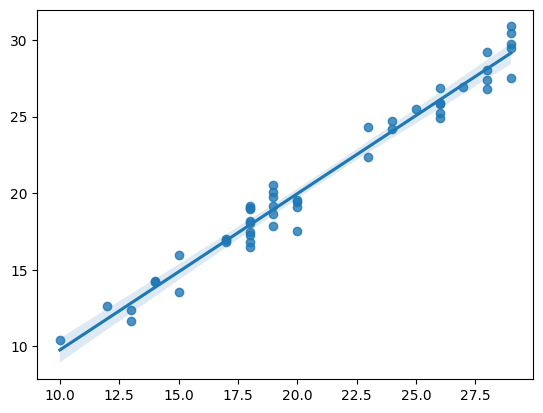

In [44]:
# plotando os dados ... 
y = data+np.random.normal(0, 1, 50)
sns.regplot(x=data, y=y, ci=99)

In [47]:
# Vamos fazer um exemplo em que encontramos o intervalo de confiança em torno da média quando
# o desvio padrão da população é desconhecido e o tamanho da amostra é pequeno.
# --------------------------------------------------------------------------------------------

# A nota média do exame de uma amostra de 10 alunos selecionados aleatoriamente é 86,7, com um 
# desvio padrão amostral de 5,72. Determine o intervalo de confiança da verdadeira média a um 
# nível de confiança de 99%.

# Como o desvio padrão da população é desconhecido e nosso tamanho de amostra é pequeno, 
# teremos que usar a fórmula do intervalo de confiança com um escore t em vez de um escore z.
media = 86.7
desvpad = 5.72
n = 10
df = n-1
conf = 0.99
area_under_distr = round((1-conf)/2,4)
t = -1*stats.t.ppf(area_under_distr, df=df, loc=0, scale=1)

ic_inf = media - (t* (desvpad/n**0.5))
ic_sup = media + (t* (desvpad/n**0.5))
print(ic_inf, ic_sup)

ic = stats.t.interval(confidence=conf,
                      df=df,
                      loc=media, 
                      scale=desvpad/df**0.5)  # aqui, transformar o desvpad em erro padrão
print(ic)

80.82162330148513 92.57837669851487
(80.50364689607737, 92.89635310392264)


In [54]:
# Vamos fazer um exemplo em que o desvio padrão populacional σ é conhecido.
# --------------------------------------------------------------------------------------------

# Uma máquina está enchendo garrafas de água e a quantidade de água nas garrafas tem um desvio 
# padrão de σ = 1 onça. Tomamos uma amostra de 100 garrafas e descobrimos que as garrafas estão 
# cheias com uma média de 16 onças de água. Qual é o intervalo de confiança para um nível de confiança de 90%?

media = 16
desvpad = 1
n = 100
df = n-1
conf = 0.90
area_under_distr = round((1-conf)/2, 4)
z = -1*stats.norm.ppf(area_under_distr, loc=0, scale=1)

ic_inf = media - (z* (desvpad/n**0.5))
ic_sup = media + (z* (desvpad/n**0.5))
print(ic_inf, ic_sup)

ic = stats.norm.interval(confidence=conf,
                         loc=media, 
                         scale=desvpad/df**0.5)  # aqui, transformar o desvpad em erro padrão
print(ic)


15.835514637304852 16.164485362695146
(15.83468599043475, 16.16531400956525)


In [62]:
# A altura dos alunos em nossa escola é normalmente distribuída com um desvio padrão de σ = 4 polegadas.
# Amostramos 50 de nossos colegas (com reposição) e obtemos uma média amostral de ̄x = 66 polegadas. 
# Qual é o intervalo de confiança para um nível de confiança de 95%?
media = 66
desvpad = 4
n = 50
df = n-1
conf = 0.95

ic = stats.norm.interval(confidence=conf,
                         loc=media, 
                         scale=desvpad/df**0.5)  # aqui, transformar o desvpad em erro padrão
print(ic)

(64.88002058026282, 67.11997941973718)


In [65]:
# Queremos saber o número médio de horas de luz do dia (o tempo entre o nascer e o pôr do sol)
# em um dia em nossa cidade ao longo de um ano. Tomamos uma amostra aleatória de 30 dias ao 
# longo do ano e obtemos uma média amostral de ̄x = 13,15 horas e um desvio padrão amostral de 
# s = 0,85 horas. Qual é o intervalo de confiança para um nível de confiança de 90%?
media = 13.15
desvpad = 0.85
n = 30
df = n-1
conf = 0.90

ic = stats.norm.interval(confidence=conf,
                         loc=media, 
                         scale=desvpad/df**0.5)  # aqui, transformar o desvpad em erro padrão
print(ic)

(12.890374597067773, 13.409625402932228)


In [61]:
# tamanho da amostra ----------------------------------------------------------------------------

# Freqüentemente, desejaremos determinar a menor amostra possível que podemos obter para manter 
# uma margem de erro específica. Podemos encontrar facilmente o tamanho da amostra manipulando 
# a fórmula da margem de erro e inserindo alguns valores.
# ME = z*σ / sqr(n)    >>     n = ( z*σ / ME )^2

# Agora digamos, por exemplo, que estamos resolvendo um problema onde queremos um intervalo de 
# confiança de 95% (correspondente a um escore z de 1,96), que o desvio padrão é 5,14 e que 
# queremos uma margem de erro de ± 2. Qual o menor tamanho de amostra possível que podemos 
# tomar para garantir que a margem de erro?
desvpad = 5.14
margem_erro = 2
conf = 0.95
area_under_distr = round((1-conf)/2, 4)

z = -1*stats.norm.ppf(area_under_distr, loc=0, scale=1)

n = (z * desvpad / margem_erro)**2
print(f'{n:.2f}')   # arredondar para cima

25.37


In [64]:
# O peso das galinhas em uma fazenda é normalmente distribuído com um desvio padrão de 
# σ = 3,5 onças. Qual é a menor amostra que podemos coletar se quisermos uma margem de 
# erro de ± 2,5 onças e quisermos ter 99% de confiança?
desvpad = 3.5
margem_erro = 2.5
conf = 0.99
area_under_distr = round((1-conf)/2, 4)

z = -1*stats.norm.ppf(area_under_distr, loc=0, scale=1)

n = (z * desvpad / margem_erro)**2
print(f'{n:.4f}')   # arredondar para cima

13.0044


---  
## Intervalo de confiança - proporção

In [ ]:
#  ̂p = number of subjects that meet our criteria / n
# (a, b) = ̂p ± z* sqr( ̂p(1 − ̂p) / n )

# fator de correção de população finita se aplica aqui também
# então, se estamos amostrando sem reposição de mais de 5% de uma população de tamanho 
# finito N (n /N > 0,05), então o intervalo de confiança para a proporção da população é dado por
# (a, b) = ̂p ± z* sqr( ̂p(1 − ̂p) / n ) * sqr( N-n / N-1 )

In [82]:
# Existem 500 tartarugas marinhas que vivem em uma baía perto de Maui, Havaí, e queremos estimar
# a proporção de machos. Digamos que pegamos uma amostra aleatória de 50 tartarugas e descobrimos
# que 20 delas são machos. Com base nesta amostra, qual é o intervalo de confiança de 90% para a 
# proporção de tartarugas marinhas machos na baía.
pop= 500
n=50
p= 20 / 50
conf = 0.9
area_under_distr = round((1-conf)/2, 4)

print(f'A distribuição pode ser garantida como normal?   {(n*p > 5) and ( n*(1-p) > 5)}')

# Parece que estamos amostrando sem reposição, usando 50/500 = 10% da população, então 
# precisaremos usar o fator de correção da população finita em nossa fórmula de intervalo de confiança.

z = -1*stats.norm.ppf(area_under_distr, loc=0, scale=1)

ic_inf = p - z * (p*(1-p)/n)**0.5 * ((pop-n)/(pop-1))**0.5
ic_sup = p + z * (p*(1-p)/n)**0.5 * ((pop-n)/(pop-1))**0.5
print(ic_inf, ic_sup)

# Interpretamos isso como significando que cerca de 90% dos intervalos de confiança que construímos
# dessa maneira (com amostras de 50 tartarugas) conterão a proporção populacional real p de tartarugas
# marinhas machos na baía.

from statsmodels.stats import proportion
ci_low, ci_upp = proportion.proportion_confint(20, n, alpha=(1-conf), method='agresti_coull')
print(ci_low, ci_upp)   # a diferença aqui acontece provavelmente pq a função não considera o ajuste do fator de correção

A distribuição pode ser garantida como normal?   True
0.29178091451773663 0.5082190854822634
0.2939069106115535 0.5163597265457005


In [113]:
# Se quisermos manter nossa margem de erro igual ou inferior a um determinado valor, podemos 
# configurar uma desigualdade que nos permitirá encontrar o tamanho amostral mínimo possível 
# que precisaríamos usar para manter a margem de erro fixa em esse máximo predefinido.

# Queremos que a margem de erro em nosso estudo de tartarugas marinhas (do exemplo anterior) 
# não seja superior a ± 4% a um nível de confiança de 90%. Encontre o menor tamanho de amostra 
# possível que podemos usar para ficar dentro dessa margem de erro.
# z* sqr( ̂p(1 − ̂p) / n ) * sqr( N-n / N-1 )   <  0.04
pop= 500
n=50
p= 20 / 50
conf = 0.9
ic = 0.04

z = -1*stats.norm.ppf((1-conf)/2, loc=0, scale=1)
n1 = pop / (1+ ( (ic*(pop-1)**0.5) / (z*(p*(1-p))**0.5 ))**2)
n12 = ((z * (p*(1-p))**0.5) / ic )**2
print(n1)
print(n12)

n2 = proportion.samplesize_confint_proportion(proportion=p, half_length=ic, alpha=(1-conf), method='normal')
print(n2)

# não sei pq dá diferença entre os 2 métdos

224.2580579863495
405.83151811431225
405.8315181143122


In [108]:
# Um estudo mostra que 78% dos pacientes que experimentam um novo medicamento para enxaqueca
# se sentem melhor em 30 minutos após tomar o medicamento. Se o estudo envolveu 120 pacientes,
# construa um intervalo de confiança de 95% para a proporção de pacientes que se sentem melhor 
# dentro de 30 minutos após tomar o medicamento.
n= 120
p= 0.78
conf = 0.95
area_under_distr = round((1-conf)/2, 4)

z = -1*stats.norm.ppf(area_under_distr, loc=0, scale=1)
 
ic_inf = p - z * (p*(1-p)/n)**0.5
ic_sup = p + z * (p*(1-p)/n)**0.5
print(ic_inf, ic_sup)



from statsmodels.stats import proportion
ci_low, ci_upp = proportion.proportion_confint(n*p, n, alpha=(1-conf), method='normal')
print(ci_low, ci_upp)

0.705883293964231 0.8541167060357691
0.705883293964231 0.8541167060357691


In [111]:
# Um estudo mostra que 243 de 500 famílias selecionadas aleatoriamente estavam usando um 
# membro da família para cuidar de seus filhos pequenos. Construa um intervalo de confiança 
# de 90% para a proporção de famílias que usam um membro da família para cuidar de crianças pequenas
pop = 500
n= 243
p= n/pop
conf = 0.9
area_under_distr = round((1-conf)/2, 4)

z = -1*stats.norm.ppf(area_under_distr, loc=0, scale=1)

ic_inf = p - z * (p*(1-p)/n)**0.5 * ((pop-n)/(pop-1))**0.5
ic_sup = p + z * (p*(1-p)/n)**0.5 * ((pop-n)/(pop-1))**0.5
print(ic_inf, ic_sup)



from statsmodels.stats import proportion
ci_low, ci_upp = proportion.proportion_confint(n*p, n, alpha=(1-conf), method='normal')
print(ci_low, ci_upp)   # diferença devido não consideração do fator de correção por n/pop > 10%

0.4481522468085665 0.5238477531914335
0.4332619807841621 0.5387380192158379


In [115]:
# Bentley é um cão que ajuda a polícia a encontrar drogas, mas tem uma baixa taxa de sucesso. 
# Durante o tempo de trabalho de Bentley, estima-se que ele identificou drogas corretamente em
# 59% das vezes. A quantas tentativas diferentes a polícia precisaria submetê-lo para verificar 
# se essa é sua taxa real de sucesso, com um nível de confiança de 95% e uma margem de erro de 0,05?
p= 0.59
conf = 0.95
margem_erro = 0.05

z = -1*stats.norm.ppf((1-conf)/2, loc=0, scale=1)
# O tamanho mínimo da amostra n que fornece uma margem de erro fixa é dado por
n1 = ((z * (p*(1-p))**0.5) / margem_erro )**2
print(n1)

n2 = proportion.samplesize_confint_proportion(proportion=p, half_length=margem_erro, alpha=(1-conf), method='normal')
print(n2)


371.6995554903635
371.69955549036354


In [ ]:
# ======================================================================================
# >> intervalo de confiança para médias
# ======================================================================================
# intervalo de confiança para amostras > 30
# ic_inf = media - (z* (desvpad/n**0.5))
# ic_sup = media + (z* (desvpad/n**0.5))

# intervalo de confiança para amostras < 30
# ic_inf = media - (t* (desvpad/n**0.5))
# ic_sup = media + (t* (desvpad/n**0.5))

# definindo a margem de erro a partir da quantidade de amostras
# margem_erro = z * desvpad / (n**0.5)

# definindo a quantidade de amostras, a partir da margem de erro 
# n = ( z * desvpad / margem_erro )**2


# ======================================================================================
# >> intervalo de confiança para proporções
# ======================================================================================
# intervalo de confiança
# ic_inf = p - z * (p*(1-p)/n)**0.5
# ic_sup = p + z * (p*(1-p)/n)**0.5

# definindo a margem de erro a partir da quantidade de amostras
# margem_erro = z * ( (p*(1-p)) / n)**0.5

# definindo a quantidade de amostras, a partir da margem de erro 
# n = ((z * (p*(1-p))**0.5) / margem_erro )**2

---  
## Estatística inferencial e hipóteses

In [ ]:
# Existem cinco etapas para o teste de hipóteses:
# 1. Enuncie as hipóteses nula e alternativa.
# 2. Determine o nível de significância. (alpha)
# 3. Calcule a estatística de teste.
# 4. Encontre o(s) valor(es) crítico(s) e determine as regiões de aceitação e rejeição.
# 5. Enuncie a conclusão. (Rejeita H0  /  Não rejeita H0)

# Antes de podermos usar estatísticas inferenciais, primeiro precisamos de uma hipótese, que é uma 
# declaração de expectativa sobre um parâmetro populacional que desenvolvemos com o propósito de testá-lo.
# Em qualquer teste de hipótese, a primeira coisa que sempre queremos fazer é enunciar as chamadas 
# hipóteses nula e alternativa. Cada teste de hipótese contém este conjunto de duas afirmações opostas 
# sobre um parâmetro populacional.
# Os testes de hipóteses também podem ser para médias ou proporções da população.

# Se H0 é μ = ou p = ,   então Ha é μ ≠ ou p ≠
# Se H0 é μ ≤ ou p ≤ ,   então Ha é μ > ou p >
# Se H0 é μ ≥ ou p ≥ ,   então Ha é μ < ou p <

In [ ]:
#             |  H0 is true            |   H0 is false
# ----------------------------------------------------------
# Reject H0   |  erro tipo I (alpha)   |   correct
# Accept H0   |  correct               |   erro tipo II (beta)

# Como α é literalmente a probabilidade de cometer um erro do Tipo I e β é literalmente a probabilidade
# de cometer um erro do Tipo II, podemos dizer que o nível alfa é
#   • a probabilidade de tomar a decisão errada quando a hipótese nula é verdadeira, ou
#   • a probabilidade de rejeitar a hipótese nula quando ela é verdadeira, ou
# e o nível beta é
#   • a probabilidade de tomar a decisão errada quando a hipótese nula é falsa, ou
#   • a probabilidade de aceitar a hipótese nula quando ela é falsa, o

# Às vezes, dizemos que o poder de um teste de hipótese é a probabilidade de rejeitarmos a hipótese nula
# quando ela é falsa, o que é uma decisão correta.
# poder = 1 - beta

# Da mesma forma que normalmente escolhemos um nível de confiança de 90%, 95% ou 99%, poderíamos 
# dizer equivalentemente que normalmente escolhemos um valor α de 10%, 5% ou 1%

In [ ]:
# Estatística inferencial para testes unicaudal e bicaudal
# ============================================================================

# Já cobrimos as duas primeiras etapas e agora queremos falar sobre como calcular a estatística de teste.
# Mas qualquer estatística de teste que calcularmos dependerá se estamos executando um teste bicaudal ou unicaudal 
# Se H0 é μ = ou p = ,   então Ha é μ ≠ ou p ≠     >>>>> bicaudal  (two-tailed)
# Se H0 é μ ≤ ou p ≤ ,   então Ha é μ > ou p >     >>>>> unicaudal (upper-tailed)
# Se H0 é μ ≥ ou p ≥ ,   então Ha é μ < ou p <     >>>>> unicaudal (lower-tailed)

# Aqui está algo um pouco complicado: quando formos procurar o z-score que corresponde ao limite da região
# de rejeição superior, perceba que apenas 5% da área de rejeição está nessa cauda superior, não 10%. 
# O que significa que, quando procuramos o z-score, precisamos procurar um z-score que corresponda a 0,9500, 
# não 0,9000, embora α = 0,10. E o mesmo vale para a cauda inferior. Quando procuramos o z-score negativo 
# que corresponde ao limite da região de rejeição na cauda inferior, precisamos procurar um z-score que 
# corresponda a 0,0500, não 0,1000, embora α = 0,10.

# teste estatístico = ( observado - expectativa) / desvpad

# >> quando conhecemos o desvpad da poulação
# ======================================================================================
# z = (media - hipotese) / (desvpad_pop / n**0.5)

# >> quando NÃO conhecemos o desvpad da poulação ou amostra <30
# ======================================================================================
# t = (media - hipotese) / (desvpad_amostra / n**0.5)

# >> quando falarmos de proporção
# ======================================================================================
# z = (prop - hipotese) / ( (hipotese*(1-hipotese))/ n )**0.5
# desvpad =                ( (hipotese*(1-hipotese))/ n )**0.5

In [ ]:
# Se p ≤ α, rejeite a hipótese nula
# Se p > α, não rejeite a hipótese nula

# lembre-se de que toda essa abordagem de valor p se aplica exatamente da mesma maneira, 
# estejamos usando uma estatística de teste z ou uma estatística de teste t.
#   Portanto, quando nossa estatística de teste é um valor t, procuramos o valor t na tabela t.
#   Para um teste de cauda inferior, o valor que encontramos torna-se o valor-p; 
#   Para um teste de cauda superior, subtraímos o valor que encontramos de 1 para obter o valor-p;
#   Para um teste bicaudal, dobramos o valor que encontramos para obter o valor-p.

# A significância (ou significância estatística) de um teste é a probabilidade de obter o resultado por acaso.
# Quanto menos provável for que tenhamos obtido um resultado por acaso, mais significativos serão nossos resultados.
# Todas essas declarações abaixo são equivalentes:
#   • A descoberta é significativa no nível 0,01
#   • O nível de confiança é de 99%
#   • A taxa de erro Tipo I é de 0,01
#   • O nível alfa é 0,01, α = 0,01
#   • A área da região de rejeição é 0,01
#   • O valor p é 0,01, p = 0,01
#   • Há uma chance de 1 em 100 de obter um resultado tão extremo ou mais extremo, como/do que este

# Quanto menor o valor-p...
#    ...mais provavelmente rejeitaremos a hipótese nula.
#    ...menor a taxa de erro Tipo I.
#    ...menor a região de rejeição.

In [23]:
# Estamos testando a alegação de que uma concessionária de carros fatura em média $ 1.000.000 
# em vendas mensais. Tomamos uma amostra aleatória de 40 meses de dados de vendas e encontramos ̄
# x = $ 985.000 e s = $ 200.000. Encontre as declarações de hipótese, escolha um teste unilateral 
# ou bicaudal e calcule uma estatística de teste.
hipo = 1000000
media = 985000
desvpad = 200000
n = 40

# como não conhecemos o desv da população...
t = (media - hipo) / (desvpad / n**0.5)
print(t)

-0.47434164902525694


In [51]:
# exemplo proporção one-tailed (upper)
# Queremos testar a hipótese de que mais de 32% dos americanos assistem ao Super Bowl, então coletamos 
# uma amostra aleatória de 1.000 americanos e descobrimos que 350 deles assistiram ao jogo. 
# O que podemos concluir a um nível de significância de α = 0,05?
h0 = 'não mais que 0.32 dos americanos assistem Super Bowl'
hipo = 0.32
n = 1000
prop = 350/n
alpha = 0.05

desvpad = ( (hipo*(1-hipo))/ n )**0.5
z = (prop - hipo) / ( (hipo*(1-hipo))/ n )**0.5
z_value = stats.norm.ppf(q=(1-alpha), loc=0, scale=1)   # (1-alpha)  pq é um teste upper-tailed
reject_h0 = z > z_value
print(f'A hipótese h0 diz que: \n   {h0}\nObtemos sucesso em rejeitar h0? >> {reject_h0}')

p_value = 1 - stats.norm.cdf(z, loc=0, scale=1)   # (1- ... )  pq é um teste upper-tailed
print(f'z = {z:.3f}  vs  z value = {z_value:.3f}   ||   alpha = {alpha:.3f}  vs  p value = {p_value:.3f}')

A hipótese h0 diz que: 
   não mais que 0.32 dos americanos assistem Super Bowl
Obtemos sucesso em rejeitar h0? >> True
z = 2.034  vs  z value = 1.645   ||   alpha = 0.050  vs  p value = 0.021


In [57]:
# exemplo proporção one-tailed (tow-tailed)
# Queremos testar a hipótese de que 32% dos americanos assistem ao Super Bowl, então coletamos uma 
# amostra aleatória de 1.000 americanos e descobrimos que 350 deles assistiram ao jogo.
# O que podemos concluir a um nível de significância de α = 0,05?
h0 = 'exatamente 0.32 dos americanos assistem Super Bowl'
hipo = 0.32
n = 1000
prop = 350/n
alpha = 0.05

desvpad = ( (hipo*(1-hipo))/ n )**0.5
z = (prop - hipo) / ( (hipo*(1-hipo))/ n )**0.5
z_value = stats.norm.ppf(q=(1-alpha/2), loc=0, scale=1)   # (1-alpha/2)  pq é um teste tow-tailed
reject_h0 = (z > z_value) or (z < -z_value)
print(f'A hipótese h0 diz que: \n   {h0}\nObtemos sucesso em rejeitar h0? >> {reject_h0}')

p_value = stats.norm.cdf(z, loc=0, scale=1)/2   # (1- ... )  pq é um teste tow-tailed
print(f'z = {z:.3f}  vs  z value = +-{z_value:.3f}   ||   alpha = {alpha:.3f}  vs  p value = {p_value:.3f}')

A hipótese h0 diz que: 
   exatamente 0.32 dos americanos assistem Super Bowl
Obtemos sucesso em rejeitar h0? >> True
z = 2.034  vs  z value = +-1.960   ||   alpha = 0.050  vs  p value = 0.490


In [59]:
# Ouvimos dizer que 10% das pessoas são canhotas. Queremos verificar essa afirmação, então coletamos 
# uma amostra aleatória de 500 pessoas e descobrimos que 43 delas são canhotas. 
# O que podemos concluir a um nível de significância de α = 0,10?
h0 = 'exatamente 0.10 da população é canhota'
hipo = 0.1
n = 500
prop = 43/n
alpha = 0.1

desvpad = ( (hipo*(1-hipo))/ n )**0.5
z = (prop - hipo) / ( (hipo*(1-hipo))/ n )**0.5
z_value = stats.norm.ppf(q=(1-alpha/2), loc=0, scale=1)   # (1-alpha/2)  pq é um teste tow-tailed
reject_h0 = (z > z_value) or (z < -z_value)
print(f'A hipótese h0 diz que: \n   {h0}\nObtemos sucesso em rejeitar h0? >> {reject_h0}')

print(f'z = {z:.3f}  vs  z value = +-{z_value:.3f}')

A hipótese h0 diz que: 
   exatamente 0.10 da população é canhota
Obtemos sucesso em rejeitar h0? >> False
z = -1.043  vs  z value = +-1.645


In [62]:
# Uma empresa de café da manhã afirma que pelo menos 80% dos americanos tomam café da manhã. 
# Queremos verificar essa afirmação, então coletamos uma amostra aleatória de 650 americanos e 
# descobrimos que 496 deles tomam café da manhã. O que podemos concluir a um nível de significância de α = 0,05?
h0 = 'pelo menos 0.80 tomam café da manhã'
hipo = 0.8
n = 650
prop = 496/n
alpha = 0.05

desvpad = ( (hipo*(1-hipo))/ n )**0.5
z = (prop - hipo) / ( (hipo*(1-hipo))/ n )**0.5
z_value = stats.norm.ppf(q=alpha, loc=0, scale=1)   #  pq é um teste upper-tailed
reject_h0 = (z > z_value) or (z < -z_value)
print(f'A hipótese h0 diz que: \n   {h0}\nObtemos sucesso em rejeitar h0? >> {reject_h0}')

p_value = stats.norm.cdf(z, loc=0, scale=1)   # (1- ... )  pq é um teste tow-tailed
print(f'z = {z:.3f}  vs  z value = +-{z_value:.3f}   ||   alpha = {alpha:.3f}  vs  p value = {p_value:.3f}')

A hipótese h0 diz que: 
   pelo menos 0.80 tomam café da manhã
Obtemos sucesso em rejeitar h0? >> True
z = -2.353  vs  z value = +--1.645   ||   alpha = 0.050  vs  p value = 0.009


In [65]:
# A NBA (National Basketball Association) afirma que não mais do que 25% dos jogadores da NBA começaram
# a jogar basquete antes dos 5 anos. Queremos verificar essa afirmação, então coletamos uma amostra 
# aleatória de 117 jogadores da NBA e descobrimos que 34 deles começaram a jogar antes idade 5. 
# O que podemos concluir com um nível de significância de α = 0,01?
h0 = 'não mais que 0.25 começaram antes dos 5 anos'
hipo = 0.25
n = 117
prop = 34/n
alpha = 0.01

desvpad = ( (hipo*(1-hipo))/ n )**0.5
z = (prop - hipo) / ( (hipo*(1-hipo))/ n )**0.5
z_value = stats.norm.ppf(q=1-alpha, loc=0, scale=1)   # pq é um teste lower-tailed
reject_h0 = (z > z_value) or (z < -z_value)
print(f'A hipótese h0 diz que: \n   {h0}\nObtemos sucesso em rejeitar h0? >> {reject_h0}')

print(f'z = {z:.3f}  vs  z value = +-{z_value:.3f}')

A hipótese h0 diz que: 
   não mais que 0.25 começaram antes dos 5 anos
Obtemos sucesso em rejeitar h0? >> False
z = 1.014  vs  z value = +-2.326


In [67]:
# ============================================================================================
# >> Intervalo de confiança para a diferença de médias
# ============================================================================================

# > intervalo de conficança para desvpad conhecido
# ============================================================================================
# ic_inf = (media1 - media2) - z * ((desvpad1**2 / n1) + (desvpad2**2 / n2))**0.5
# ic_sup = (media1 - media2) + z * ((desvpad1**2 / n1) + (desvpad2**2 / n2))**0.5

# > intervalo de conficança para desvpad NÃO conhecido c/ variações populacionais desiguais
# ============================================================================================
# df = ((var1 / n1) + (var2 / n2))**2 / (((1/(n1-1))*(var1/n1)**2) + ((1/(n2-1))*(var2/n2)**2))
# ic_inf = (media1 - media2) - t * ((var1 / n1) + (var2 / n2))**0.5
# ic_sup = (media1 - media2) + t * ((var1 / n1) + (var2 / n2))**0.5

# > intervalo de conficança para desvpad NÃO conhecido c/ variações populacionais NÃO desiguais
# ============================================================================================
# var_agrupada = (((n1-1)*var1) + ((n2-1)*var2)) / (n1+n2-2)
# desvpad_agrup = var_agrupada**0.5
# df = n1 + n2 -2
# ic_inf = (media1 - media2) - t * desvpad_agrup * ((1/n1)+(1/n2))**0.5
# ic_sup = (media1 - media2) + t * desvpad_agrup * ((1/n1)+(1/n2))**0.5


# ============================================================================================
# Como regra geral, podemos usar a variância agrupada quando as duas amostras foram retiradas da mesma 
# população ou quando nenhuma variância da amostra é mais do que o dobro da outra.
# Em outras palavras, se pegarmos nossas amostras da mesma população e não tivermos motivos para 
# acreditar que suas variâncias ou desvios padrão serão diferentes, podemos usar variância agrupada 
# e desvio padrão agrupado. Mas mesmo se pegarmos nossas amostras de diferentes populações, se suas 
# variâncias e desvios padrão forem próximos o suficiente em valor (nenhum é mais que o dobro do outro), 
# então podemos usar as fórmulas agrupadas

In [68]:
# exemplo diferença de médias para desvpad conhecido
# Uma equipe de pesquisa está testando o efeito de uma dieta pobre em carboidratos em pessoas com
# diabetes tipo 2. 400 pessoas são designadas para o grupo 1 e seguem uma dieta pobre em carboidratos, 
# enquanto outras 400 pessoas são designadas para o grupo 2 e seguem uma dieta padrão. Dadas as médias
# da amostra e os desvios padrão da população abaixo, estime um intervalo de confiança de 95% para a 
# diferença entre a queda média nos níveis de açúcar no sangue
n1, n2 = 400 , 400
x1, x2 = 9.5 , 3.2
desvpad1, desvpad2 = 0.35 , 0.28
alpha = 0.05

z = -1*stats.norm.ppf(alpha/2, loc=0, scale=1)
print(z)

ic_inf = (x1 - x2) - z * ((desvpad1**2 / n1) + (desvpad2**2 / n2))**0.5
ic_sup = (x1 - x2) + z * ((desvpad1**2 / n1) + (desvpad2**2 / n2))**0.5
print(ic_inf, ic_sup)

1.9599639845400545
6.256075374871336 6.343924625128664


In [72]:
# exemplo diferença de médias para c/ variações populacionais NÃO desiguais
# Uma equipe de pesquisa está testando o efeito de uma dieta pobre em carboidratos em pessoas com 
# diabetes tipo 2. 25 pessoas são designadas para o grupo 1 e seguem uma dieta pobre em carboidratos, 
# enquanto outras 25 pessoas são designadas para o grupo 2 e seguem uma dieta padrão. Dadas as médias 
# amostrais e os desvios padrão amostrais abaixo, estime um intervalo de confiança de 95% para a 
# diferença entre a queda média nos níveis de açúcar no sangue.
n1, n2 = 25 , 25
x1, x2 = 9.5 , 3.2
desvpad1, desvpad2 = 0.35 , 0.28
var1, var2 = desvpad1**2, desvpad2**2
alpha = 0.05

var_agrupada = (((n1-1)*var1) + ((n2-1)*var2)) / (n1+n2-2)
desvpad_agrup = var_agrupada**0.5
df = n1 + n2 -2

t = -1*stats.t.ppf(alpha/2, df=df, loc=0, scale=1)

ic_inf = (x1 - x2) - t * desvpad_agrup * ((1/n1)+(1/n2))**0.5
ic_sup = (x1 - x2) + t * desvpad_agrup * ((1/n1)+(1/n2))**0.5

print(ic_inf, ic_sup)

# Portanto, podemos dizer com 95% de confiança que a queda média nos níveis de açúcar no sangue
# é maior no grupo que estava na dieta baixa em carboidratos do que no grupo que estava na dieta 
# padrão, e que a diferença entre as médias cairá entre 6,12 e 6,48 mg/dL.

6.119759182174096 6.480240817825903


In [97]:
# Um professor está interessado em saber se as notas dos exames diferem entre duas faculdades próximas. 
# Ele seleciona uma amostra aleatória simples de 20 alunos de ambas as faculdades e encontra uma pontuação 
# média no teste de 350 com um desvio padrão de 15 na primeira faculdade e uma pontuação média no teste 
# de 390 com um desvio padrão de 30 na segunda faculdade. Supondo que as pontuações dos exames sejam 
# normalmente distribuídas em ambas as faculdades, encontre um intervalo de confiança de 95% em torno da 
# diferença nas pontuações dos exames
n1, n2 = 20 , 20
x1, x2 = 390 , 350
desvpad1, desvpad2 = 30 , 15
var1, var2 = desvpad1**2, desvpad2**2
alpha = 0.05

# Não conhecemos os desvios padrão da população e os tamanhos amostrais são menores que 30. 
# As variâncias amostrais são s1 = 900 e s2 = 225. Atribuímos as populações dessa maneira 
# para que acabemos com um resultado positivo para a diferença de significa. Não apenas as 
# amostras foram retiradas de diferentes populações, mas 900 é mais que o dobro de 225, então 
# podemos concluir que estamos trabalhando com variações populacionais desiguais.

df = ((var1 / n1) + (var2 / n2))**2 / (((1/(n1-1))*(var1/n1)**2) + ((1/(n2-1))*(var2/n2)**2))
print(f'df: {df}')
t = -1*stats.t.ppf(alpha/2, df=df//1, loc=0, scale=1)
print(f't: {t}')

ic_inf = (x1 - x2) - t * ((var1 / n1) + (var2 / n2))**0.5
ic_sup = (x1 - x2) + t * ((var1 / n1) + (var2 / n2))**0.5

print(ic_inf, ic_sup)

# Portanto, podemos dizer que temos 95% de confiança de que a verdadeira diferença entre as 
# pontuações médias dos exames está entre 24,61 e 55,39.

df: 27.94117647058824
t: 2.051830516480284
24.611271126397867 55.38872887360213


In [99]:
# Dois diretores de faculdades querem determinar se há diferença na quantia que seus alunos gastam anualmente
# em livros didáticos. Eles amostraram 200 alunos da faculdade A e 230 da faculdade B e encontraram gastos 
# médios de ̄xA = $ 1.258 e ̄xB = $ 1.150. Supondo que ambas as populações sejam normalmente distribuídas com 
# σA = $ 52 e σB = $ 64, encontre um intervalo de confiança de 99% em torno da diferença no gasto anual com livros didáticos.
# ** os desvios padrão da população são conhecidos
n1, n2 = 200 , 230
x1, x2 = 1258 , 1150
desvpad1, desvpad2 = 52 , 64
alpha = 0.01

z = -1*stats.norm.ppf(alpha/2, loc=0, scale=1)
print(f'z: {z}')

ic_inf = (x1 - x2) - z * ((desvpad1**2 / n1) + (desvpad2**2 / n2))**0.5
ic_sup = (x1 - x2) + z * ((desvpad1**2 / n1) + (desvpad2**2 / n2))**0.5
print(ic_inf, ic_sup)

# Portanto, podemos dizer que temos 99% de confiança de que a verdadeira diferença entre o gasto médio
# com livros didáticos está entre 93,559 e 122,441

z: 2.575829303548901
93.5825572206082 122.4174427793918


In [100]:
# Os proprietários de dois restaurantes na mesma rua estão interessados em saber se seus ganhos 
# diários diferem ou não. Eles pegam amostras aleatórias simples de ganhos ao longo de 15 dias e
# encontram ganhos diários médios de $ 1.365 com desvio padrão de $ 48 para o primeiro restaurante 
# e ganhos diários médios de $ 1.230 com desvio padrão de $ 28 para o segundo restaurante. Supondo 
# que os ganhos diários em ambos os restaurantes sigam uma distribuição normal, encontre um intervalo 
# de confiança de 90% em torno da diferença nos ganhos diários.
n1, n2 = 15 , 15
x1, x2 = 1365 , 1230
desvpad1, desvpad2 = 48 , 28
var1, var2 = desvpad1**2, desvpad2**2
alpha = 0.1

# Como os desvios padrão da população são desconhecidos e temos amostras pequenas n1, n 2 < 30, 
# precisaremos usar um valor t crítico em vez de um valor z crítico.
# Nossas amostras foram retiradas de diferentes populações, e uma variância amostral é mais que 
# o dobro da outra, 48^2 = 2.304 > 2(28^2) = 1.568, portanto, diremos que as variâncias populacionais são desiguais

df = ((var1 / n1) + (var2 / n2))**2 / (((1/(n1-1))*(var1/n1)**2) + ((1/(n2-1))*(var2/n2)**2))
print(f'df: {df}')
t = -1*stats.t.ppf(alpha/2, df=df//1, loc=0, scale=1)
print(f't: {t}')

ic_inf = (x1 - x2) - t * ((var1 / n1) + (var2 / n2))**0.5
ic_sup = (x1 - x2) + t * ((var1 / n1) + (var2 / n2))**0.5

print(ic_inf, ic_sup)

# Com base no intervalo de confiança, temos 90% de confiança de que a verdadeira diferença entre
# os ganhos médios diários dos dois restaurantes está entre US$ 110,36 e US$ 159,64.

df: 22.539050006483127
t: 1.7171443743802424
110.3623190079178 159.6376809920822


In [101]:
# ============================================================================================
# >> Teste de hipótese para a diferença de médias
# ============================================================================================

# > Amostras grandes, variações populacionais desiguais
# ============================================================================================
# z = ( (media1 - media2) - (μ1 - μ2) ) / ( (var1/n1) + (var2/n2) )**0.5
# (μ1 - μ2) >> se for teste onde Ha = x1 ≠ x2 , então (μ1 - μ2) = 0
# (μ1 - μ2) >> se for teste onde Ha = x1 < ou > x2 , então (μ1 - μ2) será o valor da hipótese


# > Amostras grandes, variações populacionais iguais
# ============================================================================================
# var_agrupada = ( ( ((n1-1)*var1) + ((n2-1)*var2) ) / (n1+n2-2) )**0.5
# z = ( (media1 - media2) - (μ1 - μ2) ) / ( var_agrupada * ( (1/n1) + (1/n2) )**0.5 )


# > Amostra(s) pequena(s), variações populacionais desiguais
# ============================================================================================
# t = ( (media1 - media2) - (μ1 - μ2) ) / ( (var1/n1) + (var2/n2) )**0.5
# df = ((var1 / n1) + (var2 / n2))**2 / (((1/(n1-1))*(var1/n1)**2) + ((1/(n2-1))*(var2/n2)**2))


# > Amostra(s) pequena(s), variâncias populacionais iguais
# ============================================================================================
# var_agrupada = ( ( ((n1-1)*var1) + ((n2-1)*var2) ) / (n1+n2-2) )**0.5
# t = ( (media1 - media2) - (μ1 - μ2) ) / ( var_agrupada * ( (1/n1) + (1/n2) )**0.5 )

In [108]:
# Suponha que desejamos determinar se a altura média dos homens é significativamente maior do que a 
# altura média das mulheres em uma determinada cidade, portanto, amostramos aleatoriamente 100 homens
# e 100 mulheres. Dada a média e o desvio padrão de ambas as amostras abaixo, use a abordagem de valor 
# crítico para dizer se os homens são significativamente mais altos que as mulheres em um nível de significância de 1%.
n1, n2 = 100 , 100
x1, x2 = 69.5 , 67.8
desvpad1, desvpad2 = 1.25 , 1.12
var1, var2 = desvpad1**2 , desvpad2**2
alpha = 0.01

h0 = 'os homens não são mais altos que as mulheres'  # μH − μM ≤ 0

# A variância amostral 1,5625 não é mais do que o dobro da variância amostral 1,2544, o que significa 
# que podemos assumir que as variâncias amostrais são razoavelmente iguais e, portanto, que as variâncias
# populacionais são razoavelmente iguais, então usaremos a variância agrupada.
var_agrupada = ( ( ((n1-1)*var1) + ((n2-1)*var2) ) / (n1+n2-2) )**0.5
print(f'variância agrupada = {var_agrupada}')

# como queremos ver a diferença, (μ1 - μ2) = 0
z = ( (x1 - x2) - (0) ) / ( var_agrupada * ( (1/n1) + (1/n2) )**0.5 )
z_value = stats.norm.ppf(q=1-alpha, loc=0, scale=1)   # pq é um teste upper-tailed
reject_h0 = (z > z_value) or (z < -z_value)
print(f'A hipótese h0 diz que: \n   {h0}\nObtemos sucesso em rejeitar h0? >> {reject_h0}')

p_value = 1 - stats.norm.cdf(z, loc=0, scale=1)   # (1- ... )  pq é um teste upper-tailed
print(f'z = {z:.3f}  vs  z value = +-{z_value:.3f}   ||   alpha = {alpha:.3f}  vs  p value = {p_value:.3f}')

# Como 10,13 > 2,33, podemos rejeitar a hipótese nula em α = 0,01 e concluir que a altura média 
# dos homens é maior que a altura média das mulheres.

variância agrupada = 1.1867813614984017
A hipótese h0 diz que: 
   os homens não são mais altos que as mulheres
Obtemos sucesso em rejeitar h0? >> True
z = 10.129  vs  z value = +-2.326   ||   alpha = 0.010  vs  p value = 0.000


In [112]:
# Uma empresa acredita que sua nova lâmpada durará pelo menos 30 dias a mais do que a velha. 
# Eles pegam amostras aleatórias de 20 lâmpadas velhas e 20 lâmpadas novas e encontram o seguinte:
n1, n2 = 20 , 20
x1, x2 = 254 , 205
desvpad1, desvpad2 = 5 , 13
var1, var2 = desvpad1**2 , desvpad2**2
alpha = 0.05

h0 = 'as lâmpadas não duram 30 dias a mais'  # μ1 − μ2 ≤ 30

# Podemos ver que var2 é mais do que o dobro de var1 , então podemos assumir que as variâncias 
# da amostra são desiguais e, portanto, que as variâncias da população são desiguais.

# como queremos saber se dura 30 dias a mais, (μ1 - μ2) = 30
t = ( (x1 - x2) - (30) ) / ( (var1/n1) + (var2/n2) )**0.5
df = ((var1 / n1) + (var2 / n2))**2 / (((1/(n1-1))*(var1/n1)**2) + ((1/(n2-1))*(var2/n2)**2))
df = df//1
print(f't = {t}')
print(f'df = {df}')

z_value = -1*stats.t.ppf(1-alpha, df=df, loc=0, scale=1)
reject_h0 = (z > z_value) or (z < -z_value)
print(f'A hipótese h0 diz que: \n   {h0}\nObtemos sucesso em rejeitar h0? >> {reject_h0}')

p_value = 1 - stats.norm.cdf(z, loc=0, scale=1)   # (1- ... )  pq é um teste upper-tailed
print(f'z = {t:.3f}  vs  z value = +-{z_value:.3f}   ||   alpha = {alpha:.3f}  vs  p value = {p_value:.3f}')

# Como 6,101 > 1,711, rejeitamos a hipótese nula e concluímos que a nova lâmpada dura 
# pelo menos 30 dias a mais do que a velha

t = 6.100532341145388
df = 24.0
A hipótese h0 diz que: 
   as lâmpadas não duram 30 dias a mais
Obtemos sucesso em rejeitar h0? >> True
z = 6.101  vs  z value = +--1.711   ||   alpha = 0.050  vs  p value = 0.000


In [117]:
# Dois professores de matemática, Sr. Johnson e Sr. Adams, querem determinar quais alunos tiveram 
# melhor desempenho em um exame recente. O Sr. Johnson fez uma amostra de 40 de seus alunos e encontrou 
# uma pontuação média de 84 com desvio padrão de 3,5, enquanto o Sr. Adams fez uma amostra de 38 de 
# seus alunos e encontrou uma pontuação média de 82 com desvio padrão de 3,9. Supondo que as pontuações 
# dos exames sejam normalmente distribuídas, o que eles podem concluir com nível de significância de 0,01?
n1, n2 = 40 , 38
x1, x2 = 84 , 82
desvpad1, desvpad2 = 3.5 , 3.9
var1, var2 = desvpad1**2 , desvpad2**2
alpha = 0.01

h0 = 'não há diferença entre as notas'  # μ1 − μ2 =0

var_agrupada = ( ( ((n1-1)*var1) + ((n2-1)*var2) ) / (n1+n2-2) )**0.5
print(f'variância agrupada = {var_agrupada}')

# como queremos ver a diferença, (μ1 - μ2) = 0
z = ( (x1 - x2) - (0) ) / ( var_agrupada * ( (1/n1) + (1/n2) )**0.5 )
z_value = stats.norm.ppf(q=alpha/2, loc=0, scale=1)   # pq é um teste upper-tailed
reject_h0 = (z > abs(z_value)) or (z < -abs(z_value))
print(f'A hipótese h0 diz que: \n   {h0}\nObtemos sucesso em rejeitar h0? >> {reject_h0}')

p_value = 2*(1-stats.norm.cdf(z, loc=0, scale=1))
print(f'z = {z:.3f}  vs  z value = +-{abs(z_value):.3f}   ||   alpha = {alpha:.3f}  vs  p value = {p_value:.3f}')

variância agrupada = 3.7001422447764014
A hipótese h0 diz que: 
   não há diferença entre as notas
Obtemos sucesso em rejeitar h0? >> False
z = 2.386  vs  z value = +-2.576   ||   alpha = 0.010  vs  p value = 0.017


In [122]:
# Um fabricante de motores afirma que seu novo motor consome pelo menos 0,5 galão a menos de gasolina 
# por 100 milhas, em comparação com motores mais antigos. Uma empresa de auditoria independente deseja 
# testar essa afirmação e seleciona aleatoriamente 25 carros com motores novos e 25 carros com motores 
# antigos e descobre que o novo motor consome 2,95 galões de gasolina por 100 milhas com um desvio padrão 
# de 0,14, enquanto o motor antigo consome 3,24 galões de gasolina por 100 milhas com um desvio padrão 
# de 0,19. O que a empresa de auditoria pode concluir com um nível de significância de 0,05?
n1, n2 = 25 , 25
x1, x2 = 2.95 , 3.24
desvpad1, desvpad2 = 0.14 , 0.19
var1, var2 = desvpad1**2 , desvpad2**2
alpha = 0.05

h0 = 'novo motor não consome 0.5 galão a menos que antigo'  # μ1 − μ2 >= -0.5

var_agrupada = ( ( ((n1-1)*var1) + ((n2-1)*var2) ) / (n1+n2-2) )**0.5
t = ( (x1 - x2) - (-0.5) ) / ( var_agrupada * ( (1/n1) + (1/n2) )**0.5 )
print(f'variância agrupada = {var_agrupada}')
print(f't = {t}')

df = n1+n2-2
z_value = -1*stats.t.ppf(1-alpha, df=df, loc=0, scale=1)
reject_h0 = (z > abs(z_value)) or (z < -abs(z_value))
print(f'A hipótese h0 diz que: \n   {h0}\nObtemos sucesso em rejeitar h0? >> {reject_h0}')

p_value = 1 - stats.norm.cdf(z, loc=0, scale=1)   # (1- ... )  pq é um teste upper-tailed
print(f'z = {t:.3f}  vs  z value = +-{abs(z_value):.3f}   ||   alpha = {alpha:.3f}  vs  p value = {p_value:.3f}')

# o novo motor consome pelo menos 0,5 galões de gasolina a menos por 100 milhas do que o motor antigo

variância agrupada = 0.16688319268278637
t = 4.448992785373875
A hipótese h0 diz que: 
   novo motor não consome 0.5 galão a menos que antigo
Obtemos sucesso em rejeitar h0? >> True
z = 4.449  vs  z value = +-1.677   ||   alpha = 0.050  vs  p value = 0.009


In [124]:
# Um pesquisador deseja determinar se os diretores financeiros do sexo masculino ganham mais do que as 
# diretoras financeiras do sexo feminino. Sabe-se que os desvios padrão dos salários mensais médios para 
# homens e mulheres são de $ 459 e $ 430, respectivamente. O pesquisador fez uma amostra de 35 diretores 
# do sexo masculino e 35 do sexo feminino e descobriu que os salários médios mensais eram de US$ 8.504 e 
# US$ 7.845, respectivamente. O que o pesquisador pode concluir com um nível de significância de 0,10?
n1, n2 = 35 , 35
x1, x2 = 8504 , 7845
desvpad1, desvpad2 = 459 , 430
var1, var2 = desvpad1**2 , desvpad2**2
alpha = 0.1

h0 = 'homens não ganham mais que as mulheres'  # μ1 − μ2 <= 0

var_agrupada = ( ( ((n1-1)*var1) + ((n2-1)*var2) ) / (n1+n2-2) )**0.5
print(f'variância agrupada = {var_agrupada}')

# como queremos ver se não há diferença, (μ1 - μ2) = 0
z = ( (x1 - x2) - (0) ) / ( var_agrupada * ( (1/n1) + (1/n2) )**0.5 )
z_value = stats.norm.ppf(q=1-alpha, loc=0, scale=1)
reject_h0 = (z > abs(z_value)) or (z < -abs(z_value))
print(f'A hipótese h0 diz que: \n   {h0}\nObtemos sucesso em rejeitar h0? >> {reject_h0}')

p_value = 1-stats.norm.cdf(z, loc=0, scale=1)
print(f'z = {z:.3f}  vs  z value = +-{abs(z_value):.3f}   ||   alpha = {alpha:.3f}  vs  p value = {p_value:.3f}')

variância agrupada = 444.736438803928
A hipótese h0 diz que: 
   homens não ganham mais que as mulheres
Obtemos sucesso em rejeitar h0? >> True
z = 6.199  vs  z value = +-1.282   ||   alpha = 0.100  vs  p value = 0.000


In [ ]:
# ============================================================================================
# >> Teste de hipóteses de pares combinados
# ============================================================================================

# > xxx
# ============================================================================================


In [ ]:
# > udemy
# file:///C:/Users/mmm_n/Documents/00_MMM/01_Repositorio_Conhecimento/00_CURSOS/04_UDEMY/TCS_Become%20a%20Probability%20&%20Statistics%20Master/02%20Notes/00%20Full%20course%20notes%20-%20Probability%20&%20Statistics.pdf
# file:///C:/Users/mmm_n/Documents/00_MMM/01_Repositorio_Conhecimento/00_CURSOS/04_UDEMY/TCS_Become%20a%20Probability%20&%20Statistics%20Master/03%20Quizzes/00%20Full%20course%20quizzes%20-%20Probability%20&%20Statistics.pdf

# > pedro balestrassi (pag 120)
# file:///C:/Users/mmm_n/Documents/00_MMM/01_Repositorio_Conhecimento/32_MESTRADO%20-%20Engenharia%20de%20Produ%C3%A7%C3%A3o/Estat%C3%ADstica/Apostila%20Estatistica2012.pdf

# > https://www.statology.org/

---  
## Combinação e Permutação

In [3]:
from math import factorial
from itertools import combinations
from itertools import combinations_with_replacement
from itertools import permutations

In [127]:
# permutação (ou arranjo) ------------------------------------------------------------
# Uma permutação é o número de maneiras pelas quais podemos organizar um conjunto de coisas, e a ordem importa.
# P = n! / (n-k)!
# n = total de opções
# k = agrupamento

# Eu tenho 4 bolas de sorvete: 1 chocolate, 1 morango, 1 baunilha e 1 menta.
# Eu quero comer apenas 3 das colheres. De quantas maneiras diferentes posso comer 3 das bolas 
# se considerar tanto as bolas que como e a ordem em que as como?
n, k = 4, 3

print(factorial(n) / factorial(n-k))

objeto = ['chocolate', 'morango', 'baunilha', 'menta']
agrupar = 3
perm = permutations(objeto, agrupar)
print(*perm)

24.0
('chocolate', 'morango', 'baunilha') ('chocolate', 'morango', 'menta') ('chocolate', 'baunilha', 'morango') ('chocolate', 'baunilha', 'menta') ('chocolate', 'menta', 'morango') ('chocolate', 'menta', 'baunilha') ('morango', 'chocolate', 'baunilha') ('morango', 'chocolate', 'menta') ('morango', 'baunilha', 'chocolate') ('morango', 'baunilha', 'menta') ('morango', 'menta', 'chocolate') ('morango', 'menta', 'baunilha') ('baunilha', 'chocolate', 'morango') ('baunilha', 'chocolate', 'menta') ('baunilha', 'morango', 'chocolate') ('baunilha', 'morango', 'menta') ('baunilha', 'menta', 'chocolate') ('baunilha', 'menta', 'morango') ('menta', 'chocolate', 'morango') ('menta', 'chocolate', 'baunilha') ('menta', 'morango', 'chocolate') ('menta', 'morango', 'baunilha') ('menta', 'baunilha', 'chocolate') ('menta', 'baunilha', 'morango')


In [128]:
# combinação -------------------------------------------------------------------------
# é o número de maneiras pelas quais podemos organizar um conjunto de coisas, e a ordem NÃO importa.
n, k = 4, 3

print(factorial(n) / factorial(k)*factorial(n-k))

objeto = ['chocolate', 'morango', 'baunilha', 'menta']
agrupar = 3
comb = combinations(objeto, agrupar)
print(*comb)

4.0
('chocolate', 'morango', 'baunilha') ('chocolate', 'morango', 'menta') ('chocolate', 'baunilha', 'menta') ('morango', 'baunilha', 'menta')


In [136]:
# combinação com reposição ------------------------------------------------------------
n, k = 4, 3

print(factorial(n+k-1) / (factorial(k)*factorial(n-1)))

objeto = ['chocolate', 'morango', 'baunilha', 'menta']
agrupar = 3
comb_repl = combinations_with_replacement(iterable=objeto, r=agrupar)
print(*comb_repl)

20.0
('chocolate', 'chocolate', 'chocolate') ('chocolate', 'chocolate', 'morango') ('chocolate', 'chocolate', 'baunilha') ('chocolate', 'chocolate', 'menta') ('chocolate', 'morango', 'morango') ('chocolate', 'morango', 'baunilha') ('chocolate', 'morango', 'menta') ('chocolate', 'baunilha', 'baunilha') ('chocolate', 'baunilha', 'menta') ('chocolate', 'menta', 'menta') ('morango', 'morango', 'morango') ('morango', 'morango', 'baunilha') ('morango', 'morango', 'menta') ('morango', 'baunilha', 'baunilha') ('morango', 'baunilha', 'menta') ('morango', 'menta', 'menta') ('baunilha', 'baunilha', 'baunilha') ('baunilha', 'baunilha', 'menta') ('baunilha', 'menta', 'menta') ('menta', 'menta', 'menta')


---  
## Gerando espaços amostrais

In [2]:
from itertools import product

In [3]:
opc10  = ['A', *range(2,11), 'J', 'Q', 'K']
opc11 = ['copas', 'espadas', 'ouros', 'paus']
rep_opc1 = 1
opc20 = ['cara', 'coroa']
rep_opc2 = 1

cen_opc1 = list(product(opc10, opc11, repeat=rep_opc1))
cen_opc2 = list(product(opc20, repeat=rep_opc2))
cen_opc1_2 = list(product(cen_opc1, cen_opc2, repeat=1))

print(len(cen_opc1), '\n', cen_opc1, '\n')
print(len(cen_opc2), '\n', cen_opc2, '\n')
print(len(cen_opc1_2), '\n', cen_opc1_2)

52 
 [('A', 'copas'), ('A', 'espadas'), ('A', 'ouros'), ('A', 'paus'), (2, 'copas'), (2, 'espadas'), (2, 'ouros'), (2, 'paus'), (3, 'copas'), (3, 'espadas'), (3, 'ouros'), (3, 'paus'), (4, 'copas'), (4, 'espadas'), (4, 'ouros'), (4, 'paus'), (5, 'copas'), (5, 'espadas'), (5, 'ouros'), (5, 'paus'), (6, 'copas'), (6, 'espadas'), (6, 'ouros'), (6, 'paus'), (7, 'copas'), (7, 'espadas'), (7, 'ouros'), (7, 'paus'), (8, 'copas'), (8, 'espadas'), (8, 'ouros'), (8, 'paus'), (9, 'copas'), (9, 'espadas'), (9, 'ouros'), (9, 'paus'), (10, 'copas'), (10, 'espadas'), (10, 'ouros'), (10, 'paus'), ('J', 'copas'), ('J', 'espadas'), ('J', 'ouros'), ('J', 'paus'), ('Q', 'copas'), ('Q', 'espadas'), ('Q', 'ouros'), ('Q', 'paus'), ('K', 'copas'), ('K', 'espadas'), ('K', 'ouros'), ('K', 'paus')] 

2 
 [('cara',), ('coroa',)] 

104 
 [(('A', 'copas'), ('cara',)), (('A', 'copas'), ('coroa',)), (('A', 'espadas'), ('cara',)), (('A', 'espadas'), ('coroa',)), (('A', 'ouros'), ('cara',)), (('A', 'ouros'), ('coroa',)